In [6]:
import matplotlib.pyplot as plt
import matplotlib
import pickle
import os
import sys
import numpy as np
import scipy

sys.path.append('../')
from data.data_loader import read_training_data
from config import Config

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['font.family'] = 'Times New Roman'

In [7]:
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['font.family'] = 'Times New Roman'

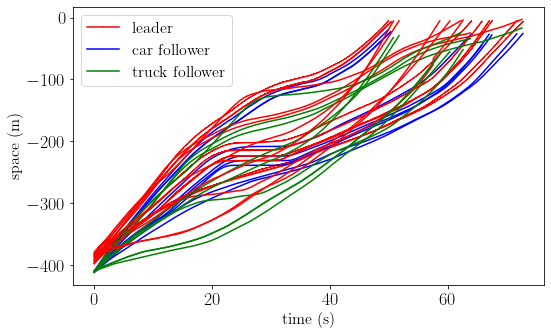

In [8]:
base_path = '../data/highD/'
tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)

figure = plt.figure(figsize=(8, 5))
for pair_id in Config.car_interactive_pair_list[0:8]:
    x = tracks[pair_id]['xFollReal']
    x_leader = tracks[pair_id]['xLeaderReal']
    dt = Config.dt
    T = dt * np.array([range(x.shape[0])]).transpose()
    
    plt.plot(T,x,'-b')
    plt.plot(T,x_leader,'-,r')

plt.plot(T,x_leader,'-,r', label='leader')
plt.plot(T,x,'-b', label='car follower')

for pair_id in Config.truck_interactive_pair_list[0:8]:
    x = tracks[pair_id]['xFollReal']
    x_leader = tracks[pair_id]['xLeaderReal']
    dt = Config.dt
    T = dt * np.array([range(x.shape[0])]).transpose()
    plt.plot(T,x,'-g')
    plt.plot(T,x_leader,'-r')

plt.plot(T,x,'-g', label='truck follower')

    
plt.xlabel('time (s)',fontsize=16)
plt.ylabel('space (m)',fontsize=16)
plt.legend(loc='best',fontsize=16)
plt.tight_layout()
plt.show()
# figure.savefig('../Figs/show_data.pdf', dpi=300)

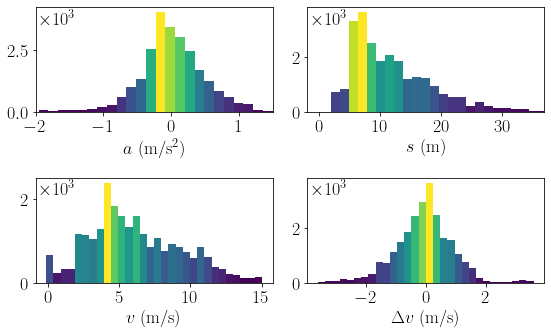

In [9]:
from matplotlib.ticker import PercentFormatter
from matplotlib import colors

base_path = '../data/highD/'
tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)

for pair_id in Config.car_interactive_pair_list[0:8]:
    if pair_id==Config.car_interactive_pair_list[0]:
        sReal = tracks[pair_id]['sReal']
        dvReal = tracks[pair_id]['dvReal']
        vFollReal = tracks[pair_id]['vFollReal']
        aFollReal = tracks[pair_id]['aFollReal']
    else:
        sReal = np.concatenate((sReal, tracks[pair_id]['sReal']))
        dvReal = np.concatenate((dvReal, tracks[pair_id]['dvReal']))
        vFollReal = np.concatenate((vFollReal, tracks[pair_id]['vFollReal']))
        aFollReal = np.concatenate((aFollReal, tracks[pair_id]['aFollReal']))

for pair_id in Config.truck_interactive_pair_list[0:8]:
    sReal = np.concatenate((sReal, tracks[pair_id]['sReal']))
    dvReal = np.concatenate((dvReal, tracks[pair_id]['dvReal']))
    vFollReal = np.concatenate((vFollReal, tracks[pair_id]['vFollReal']))
    aFollReal = np.concatenate((aFollReal, tracks[pair_id]['aFollReal']))
    
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=(8, 5))

##################
N, bins, patches = axs[0,0].hist(aFollReal, bins=30, density=False, label='a')
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

##################
N, bins, patches = axs[0,1].hist(sReal,bins=30, density=False, label='s')
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

##################
N, bins, patches = axs[1,0].hist(vFollReal,bins=30, density=False, label='v')
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

##################
N, bins, patches = axs[1,1].hist(dvReal,bins=30, density=False, label='dv')
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

axs[0,0].set_xlim([-2,1.5])
axs[0,1].set_xlim([-2,37])
# axs[1,1].set_xlim([-3,3])

axs[0,0].set_xlabel('$a$ (m/s$^2$)')
axs[0,1].set_xlabel('$s$ (m)')
axs[1,0].set_xlabel('$v$ (m/s)')
axs[1,1].set_xlabel('$\Delta v$ (m/s)')


axs[0,0].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(10,100))
axs[0,1].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(10,100))
axs[1,0].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(10,100))
axs[1,1].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(10,100))


for i, axes in enumerate(axs.flat):
    axes.get_yaxis().get_offset_text().set_visible(False)
    ax_max = max(axes.get_yticks())
    exponent_axis = np.floor(np.log10(ax_max)).astype(int)
    axes.annotate(r'$\times$10$^{%i}$'%(exponent_axis),
                 xy=(.02, .85), xycoords='axes fraction')



plt.tight_layout()
plt.show()
# fig.savefig('../Figs/data_histogram.pdf', dpi=300)

Load trace ../PGM/cache/GP_IDM_unpooled_truck-exp.pkl : done!


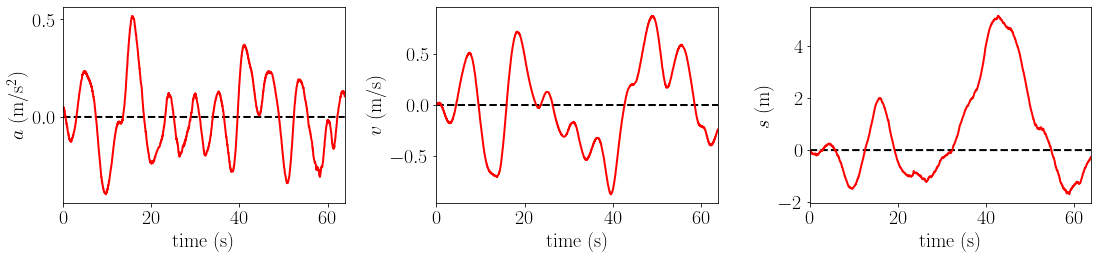

In [5]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt


def simulate(tr, sample_idx, print_values=False, mean=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    pair_id = Config.truck_interactive_pair_list[0]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    VMAX = 36
    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp

        a_follower_temp = IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_unpooled_truck-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=(16, 4))

linewidth_mean = 2
color_sim_mean = 'red'

a_follower_sim_mean_GP, a_follower, v_follower_sim_mean_GP, v_follower, s_follower_sim_mean_GP, s_real, T = simulate(tr_GP, 0, mean=True)

plt.subplot(1,3,1)
plt.xlabel('time (s)')
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(1,3,2)
plt.xlabel('time (s)')
plt.ylabel('$v$ (m/s)')

plt.subplot(1,3,3)
plt.xlabel('time (s)')
plt.ylabel('$s$ (m)')

plt.subplot(1,3,1)
plt.plot(T, np.zeros_like(T), '--', color='k', label='0', linewidth=linewidth_mean, alpha=1)
plt.plot(T,a_follower_sim_mean_GP-a_follower,'-', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.subplot(1,3,2)
plt.plot(T, np.zeros_like(T), '--', color='k', label='0', linewidth=linewidth_mean, alpha=1)
plt.plot(T,v_follower_sim_mean_GP-v_follower,'-', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.subplot(1,3,3)
plt.plot(T, np.zeros_like(T), '--', color='k', label='0', linewidth=linewidth_mean, alpha=1)
plt.plot(T,s_follower_sim_mean_GP-s_real,'-', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)


ax1.set_xlim((0,T.max()))
ax2.set_xlim((0,T.max()))
ax3.set_xlim((0,T.max()))

# ax1.set_rasterized(True)
# ax2.set_rasterized(True)
# ax3.set_rasterized(True)

plt.tight_layout()
plt.show()
fig.savefig('../Figs/noniid.pdf', dpi=300)

# Hierarchical Model

Load trace ../PGM/cache/GP_IDM_hierarchical-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl : done!
Simulation: 50 / 1000
Simulation: 100 / 1000
Simulation: 150 / 1000
Simulation: 200 / 1000
Simulation: 250 / 1000
Simulation: 300 / 1000
Simulation: 350 / 1000
Simulation: 400 / 1000
Simulation: 450 / 1000
Simulation: 500 / 1000
Simulation: 550 / 1000
Simulation: 600 / 1000
Simulation: 650 / 1000
Simulation: 700 / 1000
Simulation: 750 / 1000
Simulation: 800 / 1000
Simulation: 850 / 1000
Simulation: 900 / 1000
Simulation: 950 / 1000
Simulation: 1000 / 1000
Generated and Saved <_io.BufferedWriter name='../Simulator/cache/GP_IDM_hierarchical-sim-one-car-1000.pkl'> : done!


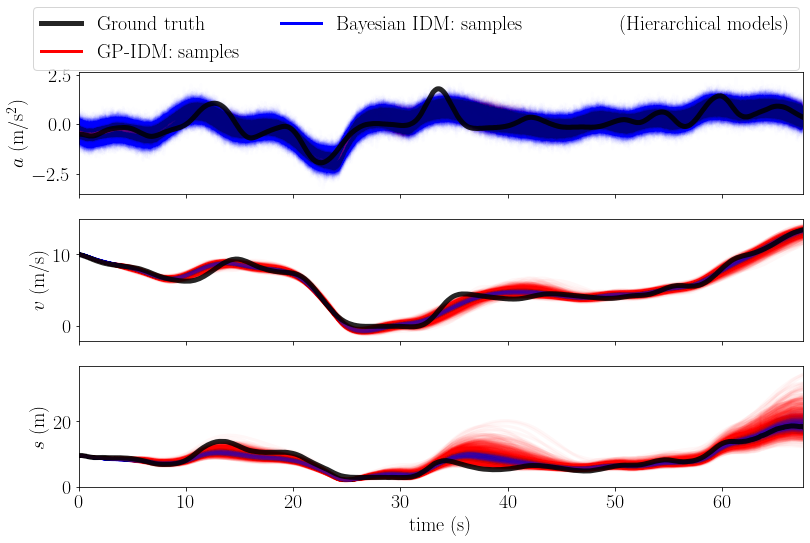

RMSE_ACC_GP samples 0.3773094277228075
RMSE_VEL_GP samples 0.5499731347056735
RMSE_GAP_GP samples 1.7095719970482572
RMSE_ACC_GP samples std 0.03744995137576933
RMSE_VEL_GP samples std 0.10129160681154833
RMSE_GAP_GP samples std 0.5487782010434551
RMSE_ACC_B samples 0.45397198319703136
RMSE_VEL_B samples 0.48608780067060803
RMSE_GAP_B samples 1.4023159289556688
RMSE_ACC_B samples std 0.00837673506352105
RMSE_VEL_B samples std 0.02160506688956043
RMSE_GAP_B samples std 0.10261188333126002
---------------------------------------------------
RMSE_ACC_GP mean 0.3558064746703938
RMSE_VEL_GP mean 0.4450868092773751
RMSE_GAP_GP mean 1.3665529138537027
RMSE_ACC_B mean 0.463583075397037
RMSE_VEL_B mean 0.5186638258655106
RMSE_GAP_B mean 1.5771398821721176


In [25]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import rbf_kernel

import pickle
from pickle import UnpicklingError
import os
from os import path

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt

def RBF_kernel(XA, XB, l=33, A=0.2):
    X_dist = A**2 * rbf_kernel(XA[:, [0]], XB[:, [0]], gamma=0.5 / l ** 2)
    return X_dist

# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12).T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

def simulate(tr, sample_idx, print_values=False, mean=False, GP_flag=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    pair_id = Config.car_interactive_pair_list[3]
    if mean:
        driver_para = tr.posterior.mu_d[:,:,3,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu_d[:,sample_idx,3,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]
    
    if GP_flag:
        # we select a window size of 2l = 66:
        sample_dim = 66
        
        t = np.array(range(-sample_dim, N)).reshape(-1,1)
        X1 = np.expand_dims(np.linspace(-sample_dim, 0, sample_dim), 1)
        y1 = np.zeros((sample_dim))
        X2 = np.expand_dims(np.linspace(0, N, N), 1)
        μ2, Σ2 = GP(X1, y1, X2, RBF_kernel)
        a_GP_sim = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=1)

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp
        
        if GP_flag:
            a_GP_sim_temp = a_GP_sim[0,t-1] + np.random.normal(0,0.1)
        else:
            a_GP_sim_temp = np.random.normal(0,0.3)

        a_follower_temp = a_GP_sim_temp + IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 8))

print_values = False
sample_num = 1000
counter = 0

linewidth = 3.
linewidth_mean = 2
linewidth_gt = 5
color_sim = 'red'
color_sim_mean = 'yellow'
color_sim_B = 'blue'
color_sim_mean_B = 'fuchsia'
color_sim_gt = 'k'
alpha = 0.03

RMSE_ACC_GP = np.zeros(sample_num)
RMSE_VEL_GP = np.zeros(sample_num)
RMSE_GAP_GP = np.zeros(sample_num)
RMSE_ACC_B = np.zeros(sample_num)
RMSE_VEL_B = np.zeros(sample_num)
RMSE_GAP_B = np.zeros(sample_num)

a_follower_sim_mean_GP, a_follower, v_follower_sim_mean_GP, v_follower, s_follower_sim_mean_GP, s_real, T = simulate(tr_GP, 0, print_values, mean=True, GP_flag=True)
a_follower_sim_mean_B, _, v_follower_sim_mean_B, _, s_follower_sim_mean_B, _, _ = simulate(tr_B, 0, print_values, mean=True)


cache = "../Simulator/cache/Hierarchical-sim-one-car-" + str(sample_num) + ".pkl"

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)
else:
    tracks = [None]*sample_num

for sample_idx in np.random.choice(range(20000), sample_num, replace=False): #range(sample_num):#
    if not path.exists(cache):
        a_follower_sim_GP, _, v_follower_sim_GP, _, s_follower_sim_GP, _, T = simulate(tr_GP, sample_idx, print_values, mean=False, GP_flag=True)
        a_follower_sim_B, _, v_follower_sim_B, _, s_follower_sim_B, _, T = simulate(tr_B, sample_idx, print_values, mean=False)

        RMSE_ACC_GP[counter] = np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower))
        RMSE_VEL_GP[counter] = np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower))
        RMSE_GAP_GP[counter] = np.sqrt(mean_squared_error(s_follower_sim_GP, s_real))

        RMSE_ACC_B[counter] = np.sqrt(mean_squared_error(a_follower_sim_B, a_follower))
        RMSE_VEL_B[counter] = np.sqrt(mean_squared_error(v_follower_sim_B, v_follower))
        RMSE_GAP_B[counter] = np.sqrt(mean_squared_error(s_follower_sim_B, s_real))

        tracks[counter] = {
            'a_follower_sim_GP': a_follower_sim_GP,
            'v_follower_sim_GP': v_follower_sim_GP,
            's_follower_sim_GP': s_follower_sim_GP,
            'a_follower_sim_B': a_follower_sim_B,
            'v_follower_sim_B': v_follower_sim_B,
            's_follower_sim_B': s_follower_sim_B,
            'RMSE_ACC_GP': np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower)),
            'RMSE_VEL_GP': np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower)),
            'RMSE_GAP_GP': np.sqrt(mean_squared_error(s_follower_sim_GP, s_real)),
            'RMSE_ACC_B': np.sqrt(mean_squared_error(a_follower_sim_B, a_follower)),
            'RMSE_VEL_B': np.sqrt(mean_squared_error(v_follower_sim_B, v_follower)),
            'RMSE_GAP_B': np.sqrt(mean_squared_error(s_follower_sim_B, s_real)),
        }
    else:
        a_follower_sim_GP = tracks[counter]['a_follower_sim_GP']
        v_follower_sim_GP = tracks[counter]['v_follower_sim_GP']
        s_follower_sim_GP = tracks[counter]['s_follower_sim_GP']
        a_follower_sim_B = tracks[counter]['a_follower_sim_B']
        v_follower_sim_B = tracks[counter]['v_follower_sim_B']
        s_follower_sim_B = tracks[counter]['s_follower_sim_B']
        RMSE_ACC_GP[counter] = tracks[counter]['RMSE_ACC_GP']
        RMSE_VEL_GP[counter] = tracks[counter]['RMSE_VEL_GP']
        RMSE_GAP_GP[counter] = tracks[counter]['RMSE_GAP_GP']
        RMSE_ACC_B[counter] = tracks[counter]['RMSE_ACC_B']
        RMSE_VEL_B[counter] = tracks[counter]['RMSE_VEL_B']
        RMSE_GAP_B[counter] = tracks[counter]['RMSE_GAP_B']
    
    counter += 1
    if print_values:
        print("RMSE_ACC_B:", RMSE_ACC_B[counter])
        print("RMSE_ACC_GP:", RMSE_ACC_GP[counter])

        print("RMSE_VEL_B:", RMSE_VEL_B[counter])
        print("RMSE_VEL_GP:", RMSE_VEL_GP[counter])

        print("RMSE_GAP_B:", RMSE_GAP_B[counter])
        print("RMSE_GAP_GP:", RMSE_GAP_GP[counter])

    plt.subplot(3,1,1)
    plt.plot(T,a_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=0.2*alpha)
    plt.plot(T,a_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=0.2*alpha)

    plt.subplot(3,1,2)
    plt.plot(T,v_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,v_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)

    plt.subplot(3,1,3)
    plt.plot(T,s_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,s_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)
    if counter % 50==0:
        print("Simulation:", counter, "/", sample_num)

if not path.exists(cache):
    output_file = open(cache, 'wb')
    pickle.dump(tracks, output_file)
    output_file.close()
    print("Generated and Saved", output_file, ": done!")

#########################################
plt.subplot(3,1,1)
plt.plot(T,a_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(3,1,2)
plt.plot(T,v_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$v$ (m/s)')

plt.subplot(3,1,3)
plt.plot(T,s_real,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.xlabel('time (s)')
plt.ylabel('$s$ (m)')

plt.subplot(3,1,1)
# plt.plot(T,a_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,a_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,a_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,a_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.plot(0,0,'--', color='w', label='(Hierarchical models)', linewidth=linewidth_mean, alpha=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.466, 1.62), fancybox=True, ncol=3)

plt.subplot(3,1,2)
# plt.plot(T,v_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,v_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,v_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,v_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.subplot(3,1,3)
# plt.plot(T,s_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,s_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,s_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,s_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

ax1.set_xlim((0,T.max()))
ax2.set_xlim((0,T.max()))
ax3.set_xlim((0,T.max()))
ax3.set_ylim((0,37))

ax1.set_rasterized(True)
ax2.set_rasterized(True)
ax3.set_rasterized(True)

plt.tight_layout()
plt.show()
# fig.savefig('../Figs/Hierarchical_sim_car.pdf', dpi=300)

print("RMSE_ACC_GP samples", RMSE_ACC_GP.mean())
print("RMSE_VEL_GP samples", RMSE_VEL_GP.mean())
print("RMSE_GAP_GP samples", RMSE_GAP_GP.mean())

print("RMSE_ACC_GP samples std", RMSE_ACC_GP.std())
print("RMSE_VEL_GP samples std", RMSE_VEL_GP.std())
print("RMSE_GAP_GP samples std", RMSE_GAP_GP.std())

print("RMSE_ACC_B samples", RMSE_ACC_B.mean())
print("RMSE_VEL_B samples", RMSE_VEL_B.mean())
print("RMSE_GAP_B samples", RMSE_GAP_B.mean())

print("RMSE_ACC_B samples std", RMSE_ACC_B.std())
print("RMSE_VEL_B samples std", RMSE_VEL_B.std())
print("RMSE_GAP_B samples std", RMSE_GAP_B.std())

print("---------------------------------------------------")

print("RMSE_ACC_GP mean", np.sqrt(mean_squared_error(a_follower_sim_mean_GP, a_follower)))
print("RMSE_VEL_GP mean", np.sqrt(mean_squared_error(v_follower_sim_mean_GP, v_follower)))
print("RMSE_GAP_GP mean", np.sqrt(mean_squared_error(s_follower_sim_mean_GP, s_real)))

print("RMSE_ACC_B mean", np.sqrt(mean_squared_error(a_follower_sim_mean_B, a_follower)))
print("RMSE_VEL_B mean", np.sqrt(mean_squared_error(v_follower_sim_mean_B, v_follower)))
print("RMSE_GAP_B mean", np.sqrt(mean_squared_error(s_follower_sim_mean_B, s_real)))

Load trace ../PGM/cache/GP_IDM_hierarchical-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl : done!
Load tracks ../Simulator/cache/Hierarchical-sim-one-truck-1000.pkl : done!
Simulation: 50 / 1000
Simulation: 100 / 1000
Simulation: 150 / 1000
Simulation: 200 / 1000
Simulation: 250 / 1000
Simulation: 300 / 1000
Simulation: 350 / 1000
Simulation: 400 / 1000
Simulation: 450 / 1000
Simulation: 500 / 1000
Simulation: 550 / 1000
Simulation: 600 / 1000
Simulation: 650 / 1000
Simulation: 700 / 1000
Simulation: 750 / 1000
Simulation: 800 / 1000
Simulation: 850 / 1000
Simulation: 900 / 1000
Simulation: 950 / 1000
Simulation: 1000 / 1000


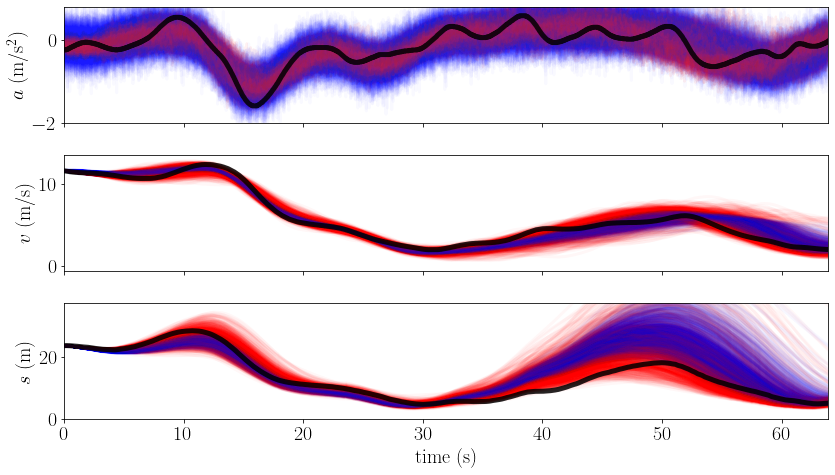

RMSE_ACC_GP samples 0.2847313506059784
RMSE_VEL_GP samples 0.6622505092059027
RMSE_GAP_GP samples 4.056354210929188
RMSE_ACC_GP samples std 0.038706147800094626
RMSE_VEL_GP samples std 0.24975628553573773
RMSE_GAP_GP samples std 3.027285650625845
RMSE_ACC_B samples 0.3704979038274571
RMSE_VEL_B samples 0.6378202600679176
RMSE_GAP_B samples 5.040607128626166
RMSE_ACC_B samples std 0.012050421776308159
RMSE_VEL_B samples std 0.16824190415053422
RMSE_GAP_B samples std 2.1721953011492885
---------------------------------------------------
RMSE_ACC_GP mean 0.26083345832745775
RMSE_VEL_GP mean 0.49838943276343345
RMSE_GAP_GP mean 3.1292762580973505
RMSE_ACC_B mean 0.3855380392962155
RMSE_VEL_B mean 0.666785963003826
RMSE_GAP_B mean 5.240750527365663


In [127]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import rbf_kernel

import pickle
from pickle import UnpicklingError
import os
from os import path

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt

def RBF_kernel(XA, XB, l=33, A=0.2):
    X_dist = A**2 * rbf_kernel(XA[:, [0]], XB[:, [0]], gamma=0.5 / l ** 2)
    return X_dist

# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12).T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

def simulate(tr, sample_idx, print_values=False, mean=False, GP_flag=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
#     pair_id = Config.car_interactive_pair_list[3]
#     if mean:
#         driver_para = tr.posterior.mu_d[:,:,3,:].mean(axis=0).mean(axis=0).to_numpy()
#     else:
#         driver_para = tr.posterior.mu_d[:,sample_idx,3,:].mean(axis=0).to_numpy()

    pair_id = Config.truck_interactive_pair_list[0]
    if mean:
        driver_para = tr.posterior.mu_d[:,:,8,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu_d[:,sample_idx,8,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]
    
    if GP_flag:
        # we select a window size of 2l = 66:
        sample_dim = 66
#         a_GP_sim = np.zeros(N)
        
        t = np.array(range(-sample_dim, N)).reshape(-1,1)
        X1 = np.expand_dims(np.linspace(-sample_dim, 0, sample_dim), 1)
        y1 = np.zeros((sample_dim))
        X2 = np.expand_dims(np.linspace(0, N, N), 1)
        μ2, Σ2 = GP(X1, y1, X2, RBF_kernel)
        a_GP_sim = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=1)
#         print('a_GP_sim',a_GP_sim,a_GP_sim.shape)
#         cov = RBF_kernel(t,t,l=33,A=0.2)
#         print('cov', cov, cov.shape)

#         Sigma11 = cov[:sample_dim,:sample_dim]
#         Sigma12 = cov[:sample_dim,sample_dim:]
#         solved = scipy.linalg.solve(Sigma11, Sigma12).T
#         m = solved @ a_GP_sim[:sample_dim]
#         Sigma = cov[sample_dim:,sample_dim:] - (solved @ cov[sample_dim:,:sample_dim])
#         print('Sigma', Sigma, Sigma.shape)
#         a_GP_sim = np.random.multivariate_normal(m, Sigma)
        

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp
        
        if GP_flag:
#             sigma_x_y = np.sqrt()
#             print('sigma_x_y',sigma_x_y, sigma_x_y.shape)
#             a_GP_sim_temp = np.random.normal(m, np.sqrt(sigma_x_y))
            a_GP_sim_temp = a_GP_sim[0,t-1] + np.random.normal(0,0.1)
#             print('a_GP_sim_temp', a_GP_sim_temp)
#             a_GP_sim = np.append(a_GP_sim[1:], a_GP_sim_temp)
#             print('a_GP_sim',a_GP_sim, a_GP_sim.shape)
        else:
            a_GP_sim_temp = np.random.normal(0,0.3)

#         a_follower_temp = IDM_a(VMAX, driver_para[0], driver_para[1], driver_para[2], driver_para[3], DELTA, s, vt, dv)
        a_follower_temp = a_GP_sim_temp + IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 7))

print_values = False
sample_num = 1000
counter = 0

linewidth = 3.
linewidth_mean = 2
linewidth_gt = 5
color_sim = 'red'
color_sim_mean = 'yellow'
color_sim_B = 'blue'
color_sim_mean_B = 'fuchsia'
color_sim_gt = 'k'
alpha = 0.03

RMSE_ACC_GP = np.zeros(sample_num)
RMSE_VEL_GP = np.zeros(sample_num)
RMSE_GAP_GP = np.zeros(sample_num)
RMSE_ACC_B = np.zeros(sample_num)
RMSE_VEL_B = np.zeros(sample_num)
RMSE_GAP_B = np.zeros(sample_num)

a_follower_sim_mean_GP, a_follower, v_follower_sim_mean_GP, v_follower, s_follower_sim_mean_GP, s_real, T = simulate(tr_GP, 0, print_values, mean=True, GP_flag=True)
a_follower_sim_mean_B, _, v_follower_sim_mean_B, _, s_follower_sim_mean_B, _, _ = simulate(tr_B, 0, print_values, mean=True)


cache = "../Simulator/cache/Hierarchical-sim-one-truck-" + str(sample_num) + ".pkl"

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)
else:
    tracks = [None]*sample_num

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

for sample_idx in np.random.choice(range(10000), sample_num, replace=False): #range(sample_num):#
    if not path.exists(cache):
        a_follower_sim_GP, _, v_follower_sim_GP, _, s_follower_sim_GP, _, T = simulate(tr_GP, sample_idx, print_values, mean=False, GP_flag=True)
        a_follower_sim_B, _, v_follower_sim_B, _, s_follower_sim_B, _, T = simulate(tr_B, sample_idx, print_values, mean=False)

        RMSE_ACC_GP[counter] = np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower))
        RMSE_VEL_GP[counter] = np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower))
        RMSE_GAP_GP[counter] = np.sqrt(mean_squared_error(s_follower_sim_GP, s_real))

        RMSE_ACC_B[counter] = np.sqrt(mean_squared_error(a_follower_sim_B, a_follower))
        RMSE_VEL_B[counter] = np.sqrt(mean_squared_error(v_follower_sim_B, v_follower))
        RMSE_GAP_B[counter] = np.sqrt(mean_squared_error(s_follower_sim_B, s_real))

        tracks[counter] = {
            'a_follower_sim_GP': a_follower_sim_GP,
            'v_follower_sim_GP': v_follower_sim_GP,
            's_follower_sim_GP': s_follower_sim_GP,
            'a_follower_sim_B': a_follower_sim_B,
            'v_follower_sim_B': v_follower_sim_B,
            's_follower_sim_B': s_follower_sim_B,
            'RMSE_ACC_GP': np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower)),
            'RMSE_VEL_GP': np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower)),
            'RMSE_GAP_GP': np.sqrt(mean_squared_error(s_follower_sim_GP, s_real)),
            'RMSE_ACC_B': np.sqrt(mean_squared_error(a_follower_sim_B, a_follower)),
            'RMSE_VEL_B': np.sqrt(mean_squared_error(v_follower_sim_B, v_follower)),
            'RMSE_GAP_B': np.sqrt(mean_squared_error(s_follower_sim_B, s_real)),
        }
    else:
        a_follower_sim_GP = tracks[counter]['a_follower_sim_GP']
        v_follower_sim_GP = tracks[counter]['v_follower_sim_GP']
        s_follower_sim_GP = tracks[counter]['s_follower_sim_GP']
        a_follower_sim_B = tracks[counter]['a_follower_sim_B']
        v_follower_sim_B = tracks[counter]['v_follower_sim_B']
        s_follower_sim_B = tracks[counter]['s_follower_sim_B']
        RMSE_ACC_GP[counter] = tracks[counter]['RMSE_ACC_GP']
        RMSE_VEL_GP[counter] = tracks[counter]['RMSE_VEL_GP']
        RMSE_GAP_GP[counter] = tracks[counter]['RMSE_GAP_GP']
        RMSE_ACC_B[counter] = tracks[counter]['RMSE_ACC_B']
        RMSE_VEL_B[counter] = tracks[counter]['RMSE_VEL_B']
        RMSE_GAP_B[counter] = tracks[counter]['RMSE_GAP_B']
    
    counter += 1
    if print_values:
        print("RMSE_ACC_B:", RMSE_ACC_B[counter])
        print("RMSE_ACC_GP:", RMSE_ACC_GP[counter])

        print("RMSE_VEL_B:", RMSE_VEL_B[counter])
        print("RMSE_VEL_GP:", RMSE_VEL_GP[counter])

        print("RMSE_GAP_B:", RMSE_GAP_B[counter])
        print("RMSE_GAP_GP:", RMSE_GAP_GP[counter])
    ######################################################################################################
    if counter % 5==0:
        plt.subplot(3,1,1)
        plt.plot(T,a_follower_sim_B,'-', color=lighten_color(color_sim_B, .9), linewidth=linewidth, alpha=.8*alpha)
        plt.plot(T,a_follower_sim_GP,'-', color=lighten_color(color_sim, .9), linewidth=0.8*linewidth, alpha=2*alpha)

    plt.subplot(3,1,2)
    plt.plot(T,v_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,v_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)

    plt.subplot(3,1,3)
    plt.plot(T,s_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,s_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)
    if counter % 50==0:
        print("Simulation:", counter, "/", sample_num)

if not path.exists(cache):
    output_file = open(cache, 'wb')
    pickle.dump(tracks, output_file)
    output_file.close()
    print("Generated and Saved", output_file, ": done!")

#########################################
plt.subplot(3,1,1)
plt.plot(T,a_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(3,1,2)
plt.plot(T,v_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$v$ (m/s)')

plt.subplot(3,1,3)
plt.plot(T,s_real,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.xlabel('time (s)')
plt.ylabel('$s$ (m)')

plt.subplot(3,1,1)
# plt.plot(T,a_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,a_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,a_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,a_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.plot(0,0,'--', color='w', label='(Hierarchical models)', linewidth=linewidth_mean, alpha=0)
# plt.legend(loc='upper center', bbox_to_anchor=(0.466, 1.62), fancybox=True, ncol=3)

plt.subplot(3,1,2)
# plt.plot(T,v_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,v_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,v_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,v_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.subplot(3,1,3)
# plt.plot(T,s_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,s_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,s_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,s_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

ax1.set_xlim((0,T.max()))
ax2.set_xlim((0,T.max()))
ax3.set_xlim((0,T.max()))
ax1.set_ylim((-2,0.8))
ax3.set_ylim((0,37))

ax1.set_rasterized(True)
ax2.set_rasterized(True)
ax3.set_rasterized(True)

plt.tight_layout()
plt.show()
fig.savefig('../Figs/Hierarchical_stochastic_sim_truck.pdf', dpi=300)

print("RMSE_ACC_GP samples", RMSE_ACC_GP.mean())
print("RMSE_VEL_GP samples", RMSE_VEL_GP.mean())
print("RMSE_GAP_GP samples", RMSE_GAP_GP.mean())

print("RMSE_ACC_GP samples std", RMSE_ACC_GP.std())
print("RMSE_VEL_GP samples std", RMSE_VEL_GP.std())
print("RMSE_GAP_GP samples std", RMSE_GAP_GP.std())

print("RMSE_ACC_B samples", RMSE_ACC_B.mean())
print("RMSE_VEL_B samples", RMSE_VEL_B.mean())
print("RMSE_GAP_B samples", RMSE_GAP_B.mean())

print("RMSE_ACC_B samples std", RMSE_ACC_B.std())
print("RMSE_VEL_B samples std", RMSE_VEL_B.std())
print("RMSE_GAP_B samples std", RMSE_GAP_B.std())

print("---------------------------------------------------")

print("RMSE_ACC_GP mean", np.sqrt(mean_squared_error(a_follower_sim_mean_GP, a_follower)))
print("RMSE_VEL_GP mean", np.sqrt(mean_squared_error(v_follower_sim_mean_GP, v_follower)))
print("RMSE_GAP_GP mean", np.sqrt(mean_squared_error(s_follower_sim_mean_GP, s_real)))

print("RMSE_ACC_B mean", np.sqrt(mean_squared_error(a_follower_sim_mean_B, a_follower)))
print("RMSE_VEL_B mean", np.sqrt(mean_squared_error(v_follower_sim_mean_B, v_follower)))
print("RMSE_GAP_B mean", np.sqrt(mean_squared_error(s_follower_sim_mean_B, s_real)))

Load trace ../PGM/cache/GP_IDM_hierarchical-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl : done!
Load tracks ../Simulator/cache/Hierarchical-sim-one-truck-1000.pkl : done!
Simulation: 100 / 1000
Simulation: 200 / 1000
Simulation: 300 / 1000
Simulation: 400 / 1000
Simulation: 500 / 1000
Simulation: 600 / 1000
Simulation: 700 / 1000
Simulation: 800 / 1000
Simulation: 900 / 1000
Simulation: 1000 / 1000


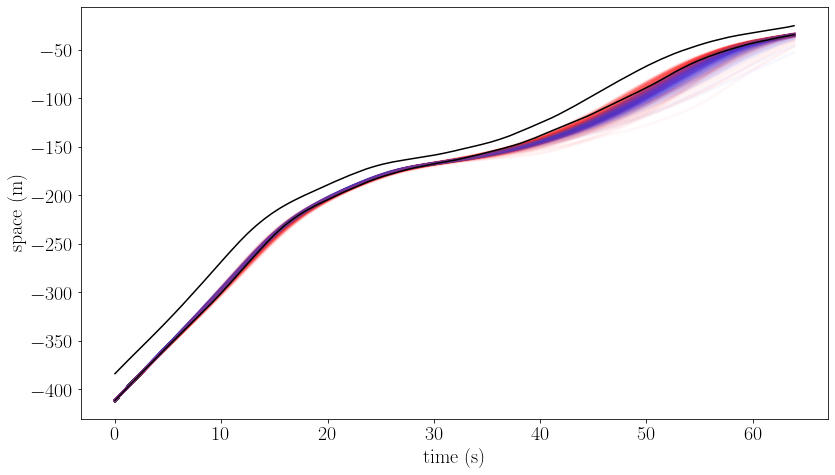

In [126]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import rbf_kernel

import pickle
from pickle import UnpicklingError
import os
from os import path

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt

def RBF_kernel(XA, XB, l=33, A=0.2):
    X_dist = A**2 * rbf_kernel(XA[:, [0]], XB[:, [0]], gamma=0.5 / l ** 2)
    return X_dist

# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12).T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

def simulate(tr, sample_idx, print_values=False, mean=False, GP_flag=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)

    pair_id = Config.truck_interactive_pair_list[0]
    if mean:
        driver_para = tr.posterior.mu_d[:,:,8,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu_d[:,sample_idx,8,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]
    
    if GP_flag:
        # we select a window size of 2l = 66:
        sample_dim = 66
        
        t = np.array(range(-sample_dim, N)).reshape(-1,1)
        X1 = np.expand_dims(np.linspace(-sample_dim, 0, sample_dim), 1)
        y1 = np.zeros((sample_dim))
        X2 = np.expand_dims(np.linspace(0, N, N), 1)
        μ2, Σ2 = GP(X1, y1, X2, RBF_kernel)
        a_GP_sim = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=1)
        

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp
        
        if GP_flag:
            a_GP_sim_temp = a_GP_sim[0,t-1] + np.random.normal(0,0.1)
        else:
            a_GP_sim_temp = np.random.normal(0,0.3)

#         a_follower_temp = IDM_a(VMAX, driver_para[0], driver_para[1], driver_para[2], driver_para[3], DELTA, s, vt, dv)
        a_follower_temp = a_GP_sim_temp + IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T, x_leader, x_follower, vehicle_length[0]

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    
fig, ax1 = plt.subplots(figsize=(12, 7))

print_values = False
sample_num = 1000
counter = 0

linewidth = 3.
linewidth_mean = 2
linewidth_gt = 5
color_sim = 'red'
color_sim_mean = 'yellow'
color_sim_B = 'blue'
color_sim_mean_B = 'fuchsia'
color_sim_gt = 'k'
alpha = 0.03

RMSE_ACC_GP = np.zeros(sample_num)
RMSE_VEL_GP = np.zeros(sample_num)
RMSE_GAP_GP = np.zeros(sample_num)
RMSE_ACC_B = np.zeros(sample_num)
RMSE_VEL_B = np.zeros(sample_num)
RMSE_GAP_B = np.zeros(sample_num)

a_follower_sim_mean_GP, a_follower, v_follower_sim_mean_GP, v_follower, s_follower_sim_mean_GP, s_real, T,  x_leader, x_follower, l = simulate(tr_GP, 0, print_values, mean=True, GP_flag=True)
a_follower_sim_mean_B, _, v_follower_sim_mean_B, _, s_follower_sim_mean_B, _, _, _, _, _ = simulate(tr_B, 0, print_values, mean=True)

cache = "../Simulator/cache/Hierarchical-sim-one-truck-" + str(sample_num) + ".pkl"

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

for sample_idx in np.random.choice(range(10000), sample_num, replace=False): #range(sample_num):#
    a_follower_sim_GP = tracks[counter]['a_follower_sim_GP']
    v_follower_sim_GP = tracks[counter]['v_follower_sim_GP']
    s_follower_sim_GP = tracks[counter]['s_follower_sim_GP']
    a_follower_sim_B = tracks[counter]['a_follower_sim_B']
    v_follower_sim_B = tracks[counter]['v_follower_sim_B']
    s_follower_sim_B = tracks[counter]['s_follower_sim_B']
    RMSE_ACC_GP[counter] = tracks[counter]['RMSE_ACC_GP']
    RMSE_VEL_GP[counter] = tracks[counter]['RMSE_VEL_GP']
    RMSE_GAP_GP[counter] = tracks[counter]['RMSE_GAP_GP']
    RMSE_ACC_B[counter] = tracks[counter]['RMSE_ACC_B']
    RMSE_VEL_B[counter] = tracks[counter]['RMSE_VEL_B']
    RMSE_GAP_B[counter] = tracks[counter]['RMSE_GAP_B']
    
    counter += 1
    if print_values:
        print("RMSE_ACC_B:", RMSE_ACC_B[counter])
        print("RMSE_ACC_GP:", RMSE_ACC_GP[counter])

        print("RMSE_VEL_B:", RMSE_VEL_B[counter])
        print("RMSE_VEL_GP:", RMSE_VEL_GP[counter])

        print("RMSE_GAP_B:", RMSE_GAP_B[counter])
        print("RMSE_GAP_GP:", RMSE_GAP_GP[counter])
    ######################################################################################################
    if counter % 5==0:
        plt.plot(T,x_leader-s_follower_sim_GP-l,'-', color=lighten_color(color_sim, .8), linewidth=linewidth, alpha=alpha)
        plt.plot(T,x_leader-s_follower_sim_B-l,'-', color=lighten_color(color_sim_B, .8), linewidth=linewidth, alpha=alpha) 
    if counter % 100==0:
        print("Simulation:", counter, "/", sample_num)

plt.plot(T,x_leader,'k')
plt.plot(T,x_follower,'k')

# ax1.set_xlim((0,T.max()))
# ax2.set_xlim((0,T.max()))
# ax3.set_xlim((0,T.max()))
# ax1.set_ylim((-2,0.8))
# ax3.set_ylim((0,37))

# ax1.set_rasterized(True)
# ax2.set_rasterized(True)
# ax3.set_rasterized(True)

plt.xlabel('time (s)')
plt.ylabel('space (m)')

plt.tight_layout()
plt.show()
# fig.savefig('../Figs/Hierarchical_stochastic_sim_truck.pdf', dpi=300)

# Pooled Model

Load trace ../PGM/cache/GP_IDM_pooled_car-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_pool_car-exp.pkl : done!
Simulation: 50 / 1000
Simulation: 100 / 1000
Simulation: 150 / 1000
Simulation: 200 / 1000
Simulation: 250 / 1000
Simulation: 300 / 1000
Simulation: 350 / 1000
Simulation: 400 / 1000
Simulation: 450 / 1000
Simulation: 500 / 1000
Simulation: 550 / 1000
Simulation: 600 / 1000
Simulation: 650 / 1000
Simulation: 700 / 1000
Simulation: 750 / 1000
Simulation: 800 / 1000
Simulation: 850 / 1000
Simulation: 900 / 1000
Simulation: 950 / 1000
Simulation: 1000 / 1000
Generated and Saved <_io.BufferedWriter name='../Simulator/cache/GP_IDM_pooled-sim-one-car-1000.pkl'> : done!


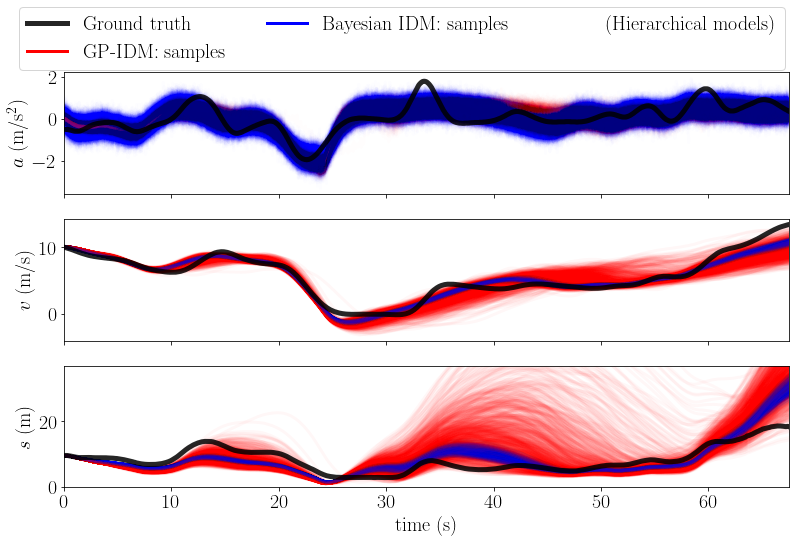

RMSE_ACC_GP samples 0.46833349270985436
RMSE_VEL_GP samples 1.2657239607758664
RMSE_GAP_GP samples 6.128413470617203
RMSE_ACC_GP samples std 0.0368445152399317
RMSE_VEL_GP samples std 0.28757074952393885
RMSE_GAP_GP samples std 3.5535403001028274
RMSE_ACC_B samples 0.49638520463978797
RMSE_VEL_B samples 0.864945998106514
RMSE_GAP_B samples 3.0780939600751265
RMSE_ACC_B samples std 0.007287629693875288
RMSE_VEL_B samples std 0.046064248696139565
RMSE_GAP_B samples std 0.23738772573105127
---------------------------------------------------
RMSE_ACC_GP mean 0.5153401632155575
RMSE_VEL_GP mean 1.3731248742140922
RMSE_GAP_GP mean 4.857183173798005
RMSE_ACC_B mean 0.4958108612800734
RMSE_VEL_B mean 0.9228354719549932
RMSE_GAP_B mean 3.362822582139551


In [26]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import rbf_kernel

import pickle
from pickle import UnpicklingError
import os
from os import path

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt

def RBF_kernel(XA, XB, l=33, A=0.2):
    X_dist = A**2 * rbf_kernel(XA[:, [0]], XB[:, [0]], gamma=0.5 / l ** 2)
    return X_dist

# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12).T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

def simulate(tr, sample_idx, print_values=False, mean=False, GP_flag=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    pair_id = Config.car_interactive_pair_list[3]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]
    
    if GP_flag:
        # we select a window size of 2l = 66:
        sample_dim = 66
        
        t = np.array(range(-sample_dim, N)).reshape(-1,1)
        X1 = np.expand_dims(np.linspace(-sample_dim, 0, sample_dim), 1)
        y1 = np.zeros((sample_dim))
        X2 = np.expand_dims(np.linspace(0, N, N), 1)
        μ2, Σ2 = GP(X1, y1, X2, RBF_kernel)
        a_GP_sim = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=1)

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp
        
        if GP_flag:
            a_GP_sim_temp = a_GP_sim[0,t-1] + np.random.normal(0,0.1)
        else:
            a_GP_sim_temp = np.random.normal(0,0.3)

        a_follower_temp = a_GP_sim_temp + IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_pooled_car-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_pool_car-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 8))

print_values = False
sample_num = 1000
counter = 0

linewidth = 3.
linewidth_mean = 2
linewidth_gt = 5
color_sim = 'red'
color_sim_mean = 'yellow'
color_sim_B = 'blue'
color_sim_mean_B = 'fuchsia'
color_sim_gt = 'k'
alpha = 0.03

RMSE_ACC_GP = np.zeros(sample_num)
RMSE_VEL_GP = np.zeros(sample_num)
RMSE_GAP_GP = np.zeros(sample_num)
RMSE_ACC_B = np.zeros(sample_num)
RMSE_VEL_B = np.zeros(sample_num)
RMSE_GAP_B = np.zeros(sample_num)

a_follower_sim_mean_GP, a_follower, v_follower_sim_mean_GP, v_follower, s_follower_sim_mean_GP, s_real, T = simulate(tr_GP, 0, print_values, mean=True, GP_flag=True)
a_follower_sim_mean_B, _, v_follower_sim_mean_B, _, s_follower_sim_mean_B, _, _ = simulate(tr_B, 0, print_values, mean=True)


cache = "../Simulator/cache/Pooled-sim-one-car-" + str(sample_num) + ".pkl"

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)
else:
    tracks = [None]*sample_num

for sample_idx in np.random.choice(range(10000), sample_num, replace=False): #range(sample_num):#
    if not path.exists(cache):
        a_follower_sim_GP, _, v_follower_sim_GP, _, s_follower_sim_GP, _, T = simulate(tr_GP, sample_idx, print_values, mean=False, GP_flag=True)
        a_follower_sim_B, _, v_follower_sim_B, _, s_follower_sim_B, _, T = simulate(tr_B, sample_idx, print_values, mean=False)

        RMSE_ACC_GP[counter] = np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower))
        RMSE_VEL_GP[counter] = np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower))
        RMSE_GAP_GP[counter] = np.sqrt(mean_squared_error(s_follower_sim_GP, s_real))

        RMSE_ACC_B[counter] = np.sqrt(mean_squared_error(a_follower_sim_B, a_follower))
        RMSE_VEL_B[counter] = np.sqrt(mean_squared_error(v_follower_sim_B, v_follower))
        RMSE_GAP_B[counter] = np.sqrt(mean_squared_error(s_follower_sim_B, s_real))

        tracks[counter] = {
            'a_follower_sim_GP': a_follower_sim_GP,
            'v_follower_sim_GP': v_follower_sim_GP,
            's_follower_sim_GP': s_follower_sim_GP,
            'a_follower_sim_B': a_follower_sim_B,
            'v_follower_sim_B': v_follower_sim_B,
            's_follower_sim_B': s_follower_sim_B,
            'RMSE_ACC_GP': np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower)),
            'RMSE_VEL_GP': np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower)),
            'RMSE_GAP_GP': np.sqrt(mean_squared_error(s_follower_sim_GP, s_real)),
            'RMSE_ACC_B': np.sqrt(mean_squared_error(a_follower_sim_B, a_follower)),
            'RMSE_VEL_B': np.sqrt(mean_squared_error(v_follower_sim_B, v_follower)),
            'RMSE_GAP_B': np.sqrt(mean_squared_error(s_follower_sim_B, s_real)),
        }
    else:
        a_follower_sim_GP = tracks[counter]['a_follower_sim_GP']
        v_follower_sim_GP = tracks[counter]['v_follower_sim_GP']
        s_follower_sim_GP = tracks[counter]['s_follower_sim_GP']
        a_follower_sim_B = tracks[counter]['a_follower_sim_B']
        v_follower_sim_B = tracks[counter]['v_follower_sim_B']
        s_follower_sim_B = tracks[counter]['s_follower_sim_B']
        RMSE_ACC_GP[counter] = tracks[counter]['RMSE_ACC_GP']
        RMSE_VEL_GP[counter] = tracks[counter]['RMSE_VEL_GP']
        RMSE_GAP_GP[counter] = tracks[counter]['RMSE_GAP_GP']
        RMSE_ACC_B[counter] = tracks[counter]['RMSE_ACC_B']
        RMSE_VEL_B[counter] = tracks[counter]['RMSE_VEL_B']
        RMSE_GAP_B[counter] = tracks[counter]['RMSE_GAP_B']
    
    counter += 1
    if print_values:
        print("RMSE_ACC_B:", RMSE_ACC_B[counter])
        print("RMSE_ACC_GP:", RMSE_ACC_GP[counter])

        print("RMSE_VEL_B:", RMSE_VEL_B[counter])
        print("RMSE_VEL_GP:", RMSE_VEL_GP[counter])

        print("RMSE_GAP_B:", RMSE_GAP_B[counter])
        print("RMSE_GAP_GP:", RMSE_GAP_GP[counter])

    plt.subplot(3,1,1)
    plt.plot(T,a_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=0.2*alpha)
    plt.plot(T,a_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=0.2*alpha)

    plt.subplot(3,1,2)
    plt.plot(T,v_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,v_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)

    plt.subplot(3,1,3)
    plt.plot(T,s_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,s_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)
    if counter % 50==0:
        print("Simulation:", counter, "/", sample_num)

if not path.exists(cache):
    output_file = open(cache, 'wb')
    pickle.dump(tracks, output_file)
    output_file.close()
    print("Generated and Saved", output_file, ": done!")

#########################################
plt.subplot(3,1,1)
plt.plot(T,a_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(3,1,2)
plt.plot(T,v_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$v$ (m/s)')

plt.subplot(3,1,3)
plt.plot(T,s_real,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.xlabel('time (s)')
plt.ylabel('$s$ (m)')

plt.subplot(3,1,1)
# plt.plot(T,a_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,a_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,a_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,a_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.plot(0,0,'--', color='w', label='(Hierarchical models)', linewidth=linewidth_mean, alpha=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.466, 1.62), fancybox=True, ncol=3)

plt.subplot(3,1,2)
# plt.plot(T,v_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,v_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,v_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,v_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.subplot(3,1,3)
# plt.plot(T,s_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,s_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,s_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,s_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

ax1.set_xlim((0,T.max()))
ax2.set_xlim((0,T.max()))
ax3.set_xlim((0,T.max()))
ax3.set_ylim((0,37))

ax1.set_rasterized(True)
ax2.set_rasterized(True)
ax3.set_rasterized(True)

plt.tight_layout()
plt.show()
# fig.savefig('../Figs/Pooled_sim_car.pdf', dpi=300)

print("RMSE_ACC_GP samples", RMSE_ACC_GP.mean())
print("RMSE_VEL_GP samples", RMSE_VEL_GP.mean())
print("RMSE_GAP_GP samples", RMSE_GAP_GP.mean())

print("RMSE_ACC_GP samples std", RMSE_ACC_GP.std())
print("RMSE_VEL_GP samples std", RMSE_VEL_GP.std())
print("RMSE_GAP_GP samples std", RMSE_GAP_GP.std())

print("RMSE_ACC_B samples", RMSE_ACC_B.mean())
print("RMSE_VEL_B samples", RMSE_VEL_B.mean())
print("RMSE_GAP_B samples", RMSE_GAP_B.mean())

print("RMSE_ACC_B samples std", RMSE_ACC_B.std())
print("RMSE_VEL_B samples std", RMSE_VEL_B.std())
print("RMSE_GAP_B samples std", RMSE_GAP_B.std())

print("---------------------------------------------------")

print("RMSE_ACC_GP mean", np.sqrt(mean_squared_error(a_follower_sim_mean_GP, a_follower)))
print("RMSE_VEL_GP mean", np.sqrt(mean_squared_error(v_follower_sim_mean_GP, v_follower)))
print("RMSE_GAP_GP mean", np.sqrt(mean_squared_error(s_follower_sim_mean_GP, s_real)))

print("RMSE_ACC_B mean", np.sqrt(mean_squared_error(a_follower_sim_mean_B, a_follower)))
print("RMSE_VEL_B mean", np.sqrt(mean_squared_error(v_follower_sim_mean_B, v_follower)))
print("RMSE_GAP_B mean", np.sqrt(mean_squared_error(s_follower_sim_mean_B, s_real)))

Load trace ../PGM/cache/GP_IDM_pooled_truck-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_pool_truck-exp.pkl : done!
Simulation: 50 / 1000
Simulation: 100 / 1000
Simulation: 150 / 1000
Simulation: 200 / 1000
Simulation: 250 / 1000
Simulation: 300 / 1000
Simulation: 350 / 1000
Simulation: 400 / 1000
Simulation: 450 / 1000
Simulation: 500 / 1000
Simulation: 550 / 1000
Simulation: 600 / 1000
Simulation: 650 / 1000
Simulation: 700 / 1000
Simulation: 750 / 1000
Simulation: 800 / 1000
Simulation: 850 / 1000
Simulation: 900 / 1000
Simulation: 950 / 1000
Simulation: 1000 / 1000
Generated and Saved <_io.BufferedWriter name='../Simulator/cache/Pooled-sim-one-truck-1000.pkl'> : done!


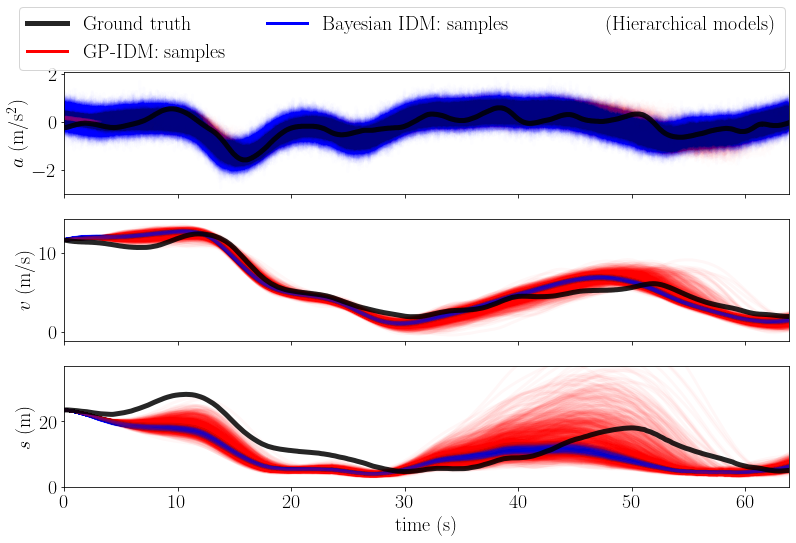

RMSE_ACC_GP samples 0.3179142144873437
RMSE_VEL_GP samples 0.9379473227717455
RMSE_GAP_GP samples 5.710720754284947
RMSE_ACC_GP samples std 0.03395989323888347
RMSE_VEL_GP samples std 0.13889128069210208
RMSE_GAP_GP samples std 1.0509182701870519
RMSE_ACC_B samples 0.40457855117348446
RMSE_VEL_B samples 0.9078474113294502
RMSE_GAP_B samples 5.703325024253003
RMSE_ACC_B samples std 0.006010765755697457
RMSE_VEL_B samples std 0.021543081846874892
RMSE_GAP_B samples std 0.12302241694711562
---------------------------------------------------
RMSE_ACC_GP mean 0.3110738265729503
RMSE_VEL_GP mean 0.9195645654192766
RMSE_GAP_GP mean 5.3778720211500906
RMSE_ACC_B mean 0.4038904395692007
RMSE_VEL_B mean 0.8892977348344865
RMSE_GAP_B mean 5.664928702138387


In [27]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import rbf_kernel

import pickle
from pickle import UnpicklingError
import os
from os import path

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt

def RBF_kernel(XA, XB, l=33, A=0.2):
    X_dist = A**2 * rbf_kernel(XA[:, [0]], XB[:, [0]], gamma=0.5 / l ** 2)
    return X_dist

# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12).T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

def simulate(tr, sample_idx, print_values=False, mean=False, GP_flag=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    
    pair_id = Config.truck_interactive_pair_list[0]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]
    
    if GP_flag:
        # we select a window size of 2l = 66:
        sample_dim = 66
        
        t = np.array(range(-sample_dim, N)).reshape(-1,1)
        X1 = np.expand_dims(np.linspace(-sample_dim, 0, sample_dim), 1)
        y1 = np.zeros((sample_dim))
        X2 = np.expand_dims(np.linspace(0, N, N), 1)
        μ2, Σ2 = GP(X1, y1, X2, RBF_kernel)
        a_GP_sim = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=1)

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp
        
        if GP_flag:
            a_GP_sim_temp = a_GP_sim[0,t-1] + np.random.normal(0,0.1)
        else:
            a_GP_sim_temp = np.random.normal(0,0.3)

        a_follower_temp = a_GP_sim_temp + IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_pooled_truck-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_pool_truck-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 8))

print_values = False
sample_num = 1000
counter = 0

linewidth = 3.
linewidth_mean = 2
linewidth_gt = 5
color_sim = 'red'
color_sim_mean = 'yellow'
color_sim_B = 'blue'
color_sim_mean_B = 'fuchsia'
color_sim_gt = 'k'
alpha = 0.03

RMSE_ACC_GP = np.zeros(sample_num)
RMSE_VEL_GP = np.zeros(sample_num)
RMSE_GAP_GP = np.zeros(sample_num)
RMSE_ACC_B = np.zeros(sample_num)
RMSE_VEL_B = np.zeros(sample_num)
RMSE_GAP_B = np.zeros(sample_num)

a_follower_sim_mean_GP, a_follower, v_follower_sim_mean_GP, v_follower, s_follower_sim_mean_GP, s_real, T = simulate(tr_GP, 0, print_values, mean=True, GP_flag=True)
a_follower_sim_mean_B, _, v_follower_sim_mean_B, _, s_follower_sim_mean_B, _, _ = simulate(tr_B, 0, print_values, mean=True)


cache = "../Simulator/cache/Pooled-sim-one-truck-" + str(sample_num) + ".pkl"

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)
else:
    tracks = [None]*sample_num

for sample_idx in np.random.choice(range(10000), sample_num, replace=False): #range(sample_num):#
    if not path.exists(cache):
        a_follower_sim_GP, _, v_follower_sim_GP, _, s_follower_sim_GP, _, T = simulate(tr_GP, sample_idx, print_values, mean=False, GP_flag=True)
        a_follower_sim_B, _, v_follower_sim_B, _, s_follower_sim_B, _, T = simulate(tr_B, sample_idx, print_values, mean=False)

        RMSE_ACC_GP[counter] = np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower))
        RMSE_VEL_GP[counter] = np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower))
        RMSE_GAP_GP[counter] = np.sqrt(mean_squared_error(s_follower_sim_GP, s_real))

        RMSE_ACC_B[counter] = np.sqrt(mean_squared_error(a_follower_sim_B, a_follower))
        RMSE_VEL_B[counter] = np.sqrt(mean_squared_error(v_follower_sim_B, v_follower))
        RMSE_GAP_B[counter] = np.sqrt(mean_squared_error(s_follower_sim_B, s_real))

        tracks[counter] = {
            'a_follower_sim_GP': a_follower_sim_GP,
            'v_follower_sim_GP': v_follower_sim_GP,
            's_follower_sim_GP': s_follower_sim_GP,
            'a_follower_sim_B': a_follower_sim_B,
            'v_follower_sim_B': v_follower_sim_B,
            's_follower_sim_B': s_follower_sim_B,
            'RMSE_ACC_GP': np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower)),
            'RMSE_VEL_GP': np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower)),
            'RMSE_GAP_GP': np.sqrt(mean_squared_error(s_follower_sim_GP, s_real)),
            'RMSE_ACC_B': np.sqrt(mean_squared_error(a_follower_sim_B, a_follower)),
            'RMSE_VEL_B': np.sqrt(mean_squared_error(v_follower_sim_B, v_follower)),
            'RMSE_GAP_B': np.sqrt(mean_squared_error(s_follower_sim_B, s_real)),
        }
    else:
        a_follower_sim_GP = tracks[counter]['a_follower_sim_GP']
        v_follower_sim_GP = tracks[counter]['v_follower_sim_GP']
        s_follower_sim_GP = tracks[counter]['s_follower_sim_GP']
        a_follower_sim_B = tracks[counter]['a_follower_sim_B']
        v_follower_sim_B = tracks[counter]['v_follower_sim_B']
        s_follower_sim_B = tracks[counter]['s_follower_sim_B']
        RMSE_ACC_GP[counter] = tracks[counter]['RMSE_ACC_GP']
        RMSE_VEL_GP[counter] = tracks[counter]['RMSE_VEL_GP']
        RMSE_GAP_GP[counter] = tracks[counter]['RMSE_GAP_GP']
        RMSE_ACC_B[counter] = tracks[counter]['RMSE_ACC_B']
        RMSE_VEL_B[counter] = tracks[counter]['RMSE_VEL_B']
        RMSE_GAP_B[counter] = tracks[counter]['RMSE_GAP_B']
    
    counter += 1
    if print_values:
        print("RMSE_ACC_B:", RMSE_ACC_B[counter])
        print("RMSE_ACC_GP:", RMSE_ACC_GP[counter])

        print("RMSE_VEL_B:", RMSE_VEL_B[counter])
        print("RMSE_VEL_GP:", RMSE_VEL_GP[counter])

        print("RMSE_GAP_B:", RMSE_GAP_B[counter])
        print("RMSE_GAP_GP:", RMSE_GAP_GP[counter])

    plt.subplot(3,1,1)
    plt.plot(T,a_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=0.2*alpha)
    plt.plot(T,a_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=0.2*alpha)

    plt.subplot(3,1,2)
    plt.plot(T,v_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,v_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)

    plt.subplot(3,1,3)
    plt.plot(T,s_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,s_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)
    if counter % 50==0:
        print("Simulation:", counter, "/", sample_num)

if not path.exists(cache):
    output_file = open(cache, 'wb')
    pickle.dump(tracks, output_file)
    output_file.close()
    print("Generated and Saved", output_file, ": done!")

#########################################
plt.subplot(3,1,1)
plt.plot(T,a_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(3,1,2)
plt.plot(T,v_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$v$ (m/s)')

plt.subplot(3,1,3)
plt.plot(T,s_real,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.xlabel('time (s)')
plt.ylabel('$s$ (m)')

plt.subplot(3,1,1)
# plt.plot(T,a_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,a_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,a_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,a_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.plot(0,0,'--', color='w', label='(Hierarchical models)', linewidth=linewidth_mean, alpha=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.466, 1.62), fancybox=True, ncol=3)

plt.subplot(3,1,2)
# plt.plot(T,v_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,v_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,v_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,v_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

plt.subplot(3,1,3)
# plt.plot(T,s_follower_sim_mean_GP,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,s_follower_sim_mean_GP,'--', color=color_sim_mean, label='GP-IDM: mean', linewidth=linewidth_mean, alpha=1)
# plt.plot(T,s_follower_sim_mean_B,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=alpha)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)
# plt.plot(T,s_follower_sim_mean_B,'--', color=color_sim_mean_B, label='Bayesian IDM: mean', linewidth=linewidth_mean, alpha=1)

ax1.set_xlim((0,T.max()))
ax2.set_xlim((0,T.max()))
ax3.set_xlim((0,T.max()))
ax3.set_ylim((0,37))

ax1.set_rasterized(True)
ax2.set_rasterized(True)
ax3.set_rasterized(True)

plt.tight_layout()
plt.show()
# fig.savefig('../Figs/Pooled_sim_truck.pdf', dpi=300)

print("RMSE_ACC_GP samples", RMSE_ACC_GP.mean())
print("RMSE_VEL_GP samples", RMSE_VEL_GP.mean())
print("RMSE_GAP_GP samples", RMSE_GAP_GP.mean())

print("RMSE_ACC_GP samples std", RMSE_ACC_GP.std())
print("RMSE_VEL_GP samples std", RMSE_VEL_GP.std())
print("RMSE_GAP_GP samples std", RMSE_GAP_GP.std())

print("RMSE_ACC_B samples", RMSE_ACC_B.mean())
print("RMSE_VEL_B samples", RMSE_VEL_B.mean())
print("RMSE_GAP_B samples", RMSE_GAP_B.mean())

print("RMSE_ACC_B samples std", RMSE_ACC_B.std())
print("RMSE_VEL_B samples std", RMSE_VEL_B.std())
print("RMSE_GAP_B samples std", RMSE_GAP_B.std())

print("---------------------------------------------------")

print("RMSE_ACC_GP mean", np.sqrt(mean_squared_error(a_follower_sim_mean_GP, a_follower)))
print("RMSE_VEL_GP mean", np.sqrt(mean_squared_error(v_follower_sim_mean_GP, v_follower)))
print("RMSE_GAP_GP mean", np.sqrt(mean_squared_error(s_follower_sim_mean_GP, s_real)))

print("RMSE_ACC_B mean", np.sqrt(mean_squared_error(a_follower_sim_mean_B, a_follower)))
print("RMSE_VEL_B mean", np.sqrt(mean_squared_error(v_follower_sim_mean_B, v_follower)))
print("RMSE_GAP_B mean", np.sqrt(mean_squared_error(s_follower_sim_mean_B, s_real)))

# Unpooled Model

Load trace ../PGM/cache/GP_IDM_unpooled_car-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_unpool_car-exp.pkl : done!
Load tracks ../Simulator/cache/Unpooled-sim-one-car-1000.pkl : done!
Simulation: 50 / 1000
Simulation: 100 / 1000
Simulation: 150 / 1000
Simulation: 200 / 1000
Simulation: 250 / 1000
Simulation: 300 / 1000
Simulation: 350 / 1000
Simulation: 400 / 1000
Simulation: 450 / 1000
Simulation: 500 / 1000
Simulation: 550 / 1000
Simulation: 600 / 1000
Simulation: 650 / 1000
Simulation: 700 / 1000
Simulation: 750 / 1000
Simulation: 800 / 1000
Simulation: 850 / 1000
Simulation: 900 / 1000
Simulation: 950 / 1000
Simulation: 1000 / 1000


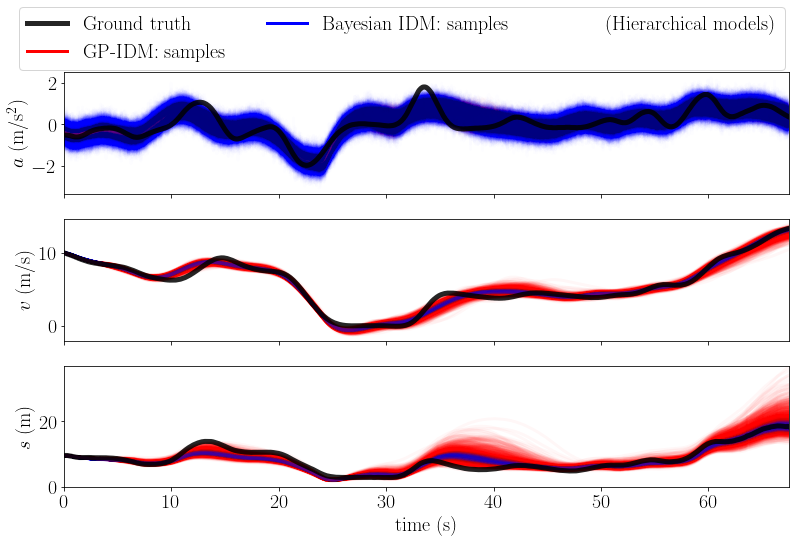

RMSE_ACC_GP samples 0.3793385759141594
RMSE_VEL_GP samples 0.5564853504293196
RMSE_GAP_GP samples 1.7451103484806045
RMSE_ACC_GP samples std 0.03436346501413247
RMSE_VEL_GP samples std 0.09586250525741614
RMSE_GAP_GP samples std 0.5281355061889145
RMSE_ACC_B samples 0.45329360718362943
RMSE_VEL_B samples 0.4806239763652575
RMSE_GAP_B samples 1.3799579251140544
RMSE_ACC_B samples std 0.007698409764214747
RMSE_VEL_B samples std 0.01780350697070687
RMSE_GAP_B samples std 0.08088606656676668
---------------------------------------------------
RMSE_ACC_GP mean 0.35343671949193184
RMSE_VEL_GP mean 0.5241727690233386
RMSE_GAP_GP mean 1.3886306727354387
RMSE_ACC_B mean 0.4680194761045742
RMSE_VEL_B mean 0.4947910303640568
RMSE_GAP_B mean 1.4337193538390587


In [72]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import rbf_kernel

import pickle
from pickle import UnpicklingError
import os
from os import path

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt

def RBF_kernel(XA, XB, l=33, A=0.2):
    X_dist = A**2 * rbf_kernel(XA[:, [0]], XB[:, [0]], gamma=0.5 / l ** 2)
    return X_dist

# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12).T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

def simulate(tr, sample_idx, print_values=False, mean=False, GP_flag=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    
    pair_id = Config.car_interactive_pair_list[3]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]
    
    if GP_flag:
        # we select a window size of 2l = 66:
        sample_dim = 66
        
        t = np.array(range(-sample_dim, N)).reshape(-1,1)
        X1 = np.expand_dims(np.linspace(-sample_dim, 0, sample_dim), 1)
        y1 = np.zeros((sample_dim))
        X2 = np.expand_dims(np.linspace(0, N, N), 1)
        μ2, Σ2 = GP(X1, y1, X2, RBF_kernel)
        a_GP_sim = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=1)

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp
        
        if GP_flag:
            a_GP_sim_temp = a_GP_sim[0,t-1] + np.random.normal(0,0.1)
        else:
            a_GP_sim_temp = np.random.normal(0,0.3)

        a_follower_temp = a_GP_sim_temp + IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_unpooled_car-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_unpool_car-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 8))

print_values = False
sample_num = 1000
counter = 0

linewidth = 3.
linewidth_mean = 2
linewidth_gt = 5
color_sim = 'red'
color_sim_mean = 'yellow'
color_sim_B = 'blue'
color_sim_mean_B = 'fuchsia'
color_sim_gt = 'k'
alpha = 0.03

RMSE_ACC_GP = np.zeros(sample_num)
RMSE_VEL_GP = np.zeros(sample_num)
RMSE_GAP_GP = np.zeros(sample_num)
RMSE_ACC_B = np.zeros(sample_num)
RMSE_VEL_B = np.zeros(sample_num)
RMSE_GAP_B = np.zeros(sample_num)

a_follower_sim_mean_GP, a_follower, v_follower_sim_mean_GP, v_follower, s_follower_sim_mean_GP, s_real, T = simulate(tr_GP, 0, print_values, mean=True, GP_flag=True)
a_follower_sim_mean_B, _, v_follower_sim_mean_B, _, s_follower_sim_mean_B, _, _ = simulate(tr_B, 0, print_values, mean=True)


cache = "../Simulator/cache/Unpooled-sim-one-car-" + str(sample_num) + ".pkl"

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)
else:
    tracks = [None]*sample_num

for sample_idx in np.random.choice(range(10000), sample_num, replace=False): #range(sample_num):#
    if not path.exists(cache):
        a_follower_sim_GP, _, v_follower_sim_GP, _, s_follower_sim_GP, _, T = simulate(tr_GP, sample_idx, print_values, mean=False, GP_flag=True)
        a_follower_sim_B, _, v_follower_sim_B, _, s_follower_sim_B, _, T = simulate(tr_B, sample_idx, print_values, mean=False)

        RMSE_ACC_GP[counter] = np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower))
        RMSE_VEL_GP[counter] = np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower))
        RMSE_GAP_GP[counter] = np.sqrt(mean_squared_error(s_follower_sim_GP, s_real))

        RMSE_ACC_B[counter] = np.sqrt(mean_squared_error(a_follower_sim_B, a_follower))
        RMSE_VEL_B[counter] = np.sqrt(mean_squared_error(v_follower_sim_B, v_follower))
        RMSE_GAP_B[counter] = np.sqrt(mean_squared_error(s_follower_sim_B, s_real))

        tracks[counter] = {
            'a_follower_sim_GP': a_follower_sim_GP,
            'v_follower_sim_GP': v_follower_sim_GP,
            's_follower_sim_GP': s_follower_sim_GP,
            'a_follower_sim_B': a_follower_sim_B,
            'v_follower_sim_B': v_follower_sim_B,
            's_follower_sim_B': s_follower_sim_B,
            'RMSE_ACC_GP': np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower)),
            'RMSE_VEL_GP': np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower)),
            'RMSE_GAP_GP': np.sqrt(mean_squared_error(s_follower_sim_GP, s_real)),
            'RMSE_ACC_B': np.sqrt(mean_squared_error(a_follower_sim_B, a_follower)),
            'RMSE_VEL_B': np.sqrt(mean_squared_error(v_follower_sim_B, v_follower)),
            'RMSE_GAP_B': np.sqrt(mean_squared_error(s_follower_sim_B, s_real)),
        }
    else:
        a_follower_sim_GP = tracks[counter]['a_follower_sim_GP']
        v_follower_sim_GP = tracks[counter]['v_follower_sim_GP']
        s_follower_sim_GP = tracks[counter]['s_follower_sim_GP']
        a_follower_sim_B = tracks[counter]['a_follower_sim_B']
        v_follower_sim_B = tracks[counter]['v_follower_sim_B']
        s_follower_sim_B = tracks[counter]['s_follower_sim_B']
        RMSE_ACC_GP[counter] = tracks[counter]['RMSE_ACC_GP']
        RMSE_VEL_GP[counter] = tracks[counter]['RMSE_VEL_GP']
        RMSE_GAP_GP[counter] = tracks[counter]['RMSE_GAP_GP']
        RMSE_ACC_B[counter] = tracks[counter]['RMSE_ACC_B']
        RMSE_VEL_B[counter] = tracks[counter]['RMSE_VEL_B']
        RMSE_GAP_B[counter] = tracks[counter]['RMSE_GAP_B']
    
    counter += 1
    if print_values:
        print("RMSE_ACC_B:", RMSE_ACC_B[counter])
        print("RMSE_ACC_GP:", RMSE_ACC_GP[counter])

        print("RMSE_VEL_B:", RMSE_VEL_B[counter])
        print("RMSE_VEL_GP:", RMSE_VEL_GP[counter])

        print("RMSE_GAP_B:", RMSE_GAP_B[counter])
        print("RMSE_GAP_GP:", RMSE_GAP_GP[counter])

    plt.subplot(3,1,1)
    plt.plot(T,a_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=0.2*alpha)
    plt.plot(T,a_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=0.2*alpha)

    plt.subplot(3,1,2)
    plt.plot(T,v_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,v_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)

    plt.subplot(3,1,3)
    plt.plot(T,s_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,s_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)
    if counter % 50==0:
        print("Simulation:", counter, "/", sample_num)

if not path.exists(cache):
    output_file = open(cache, 'wb')
    pickle.dump(tracks, output_file)
    output_file.close()
    print("Generated and Saved", output_file, ": done!")

#########################################
plt.subplot(3,1,1)
plt.plot(T,a_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(3,1,2)
plt.plot(T,v_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$v$ (m/s)')

plt.subplot(3,1,3)
plt.plot(T,s_real,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.xlabel('time (s)')
plt.ylabel('$s$ (m)')

plt.subplot(3,1,1)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)

plt.plot(0,0,'--', color='w', label='(Hierarchical models)', linewidth=linewidth_mean, alpha=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.466, 1.62), fancybox=True, ncol=3)

plt.subplot(3,1,2)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)

plt.subplot(3,1,3)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)

ax1.set_xlim((0,T.max()))
ax2.set_xlim((0,T.max()))
ax3.set_xlim((0,T.max()))
ax3.set_ylim((0,37))

ax1.set_rasterized(True)
ax2.set_rasterized(True)
ax3.set_rasterized(True)

plt.tight_layout()
plt.show()
# fig.savefig('../Figs/Unpooled_sim_car.pdf', dpi=300)

print("RMSE_ACC_GP samples", RMSE_ACC_GP.mean())
print("RMSE_VEL_GP samples", RMSE_VEL_GP.mean())
print("RMSE_GAP_GP samples", RMSE_GAP_GP.mean())

print("RMSE_ACC_GP samples std", RMSE_ACC_GP.std())
print("RMSE_VEL_GP samples std", RMSE_VEL_GP.std())
print("RMSE_GAP_GP samples std", RMSE_GAP_GP.std())

print("RMSE_ACC_B samples", RMSE_ACC_B.mean())
print("RMSE_VEL_B samples", RMSE_VEL_B.mean())
print("RMSE_GAP_B samples", RMSE_GAP_B.mean())

print("RMSE_ACC_B samples std", RMSE_ACC_B.std())
print("RMSE_VEL_B samples std", RMSE_VEL_B.std())
print("RMSE_GAP_B samples std", RMSE_GAP_B.std())

print("---------------------------------------------------")

print("RMSE_ACC_GP mean", np.sqrt(mean_squared_error(a_follower_sim_mean_GP, a_follower)))
print("RMSE_VEL_GP mean", np.sqrt(mean_squared_error(v_follower_sim_mean_GP, v_follower)))
print("RMSE_GAP_GP mean", np.sqrt(mean_squared_error(s_follower_sim_mean_GP, s_real)))

print("RMSE_ACC_B mean", np.sqrt(mean_squared_error(a_follower_sim_mean_B, a_follower)))
print("RMSE_VEL_B mean", np.sqrt(mean_squared_error(v_follower_sim_mean_B, v_follower)))
print("RMSE_GAP_B mean", np.sqrt(mean_squared_error(s_follower_sim_mean_B, s_real)))

Load trace ../PGM/cache/GP_IDM_unpooled_truck-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_unpool_truck-exp.pkl : done!
Load tracks ../Simulator/cache/Unpooled-sim-one-truck-1000.pkl : done!
Simulation: 50 / 1000
Simulation: 100 / 1000
Simulation: 150 / 1000
Simulation: 200 / 1000
Simulation: 250 / 1000
Simulation: 300 / 1000
Simulation: 350 / 1000
Simulation: 400 / 1000
Simulation: 450 / 1000
Simulation: 500 / 1000
Simulation: 550 / 1000
Simulation: 600 / 1000
Simulation: 650 / 1000
Simulation: 700 / 1000
Simulation: 750 / 1000
Simulation: 800 / 1000
Simulation: 850 / 1000
Simulation: 900 / 1000
Simulation: 950 / 1000
Simulation: 1000 / 1000


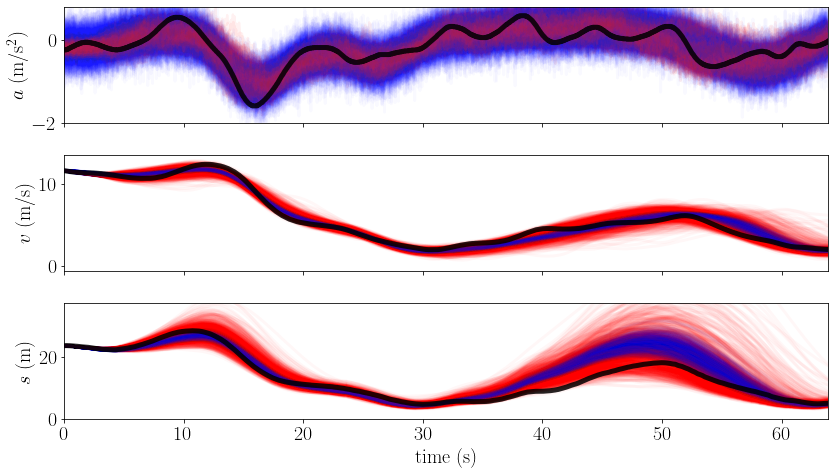

RMSE_ACC_GP samples 0.28629496949404315
RMSE_VEL_GP samples 0.6333223783005001
RMSE_GAP_GP samples 3.5514616233201406
RMSE_ACC_GP samples std 0.03757385863032325
RMSE_VEL_GP samples std 0.20288151095699902
RMSE_GAP_GP samples std 2.3618325321674565
RMSE_ACC_B samples 0.36268253473460693
RMSE_VEL_B samples 0.4982147695231846
RMSE_GAP_B samples 3.1584166228723345
RMSE_ACC_B samples std 0.007451702014607986
RMSE_VEL_B samples std 0.058392194495767706
RMSE_GAP_B samples std 0.7200936477362464
---------------------------------------------------
RMSE_ACC_GP mean 0.27764058079224824
RMSE_VEL_GP mean 0.6337542634712804
RMSE_GAP_GP mean 4.659999399895615
RMSE_ACC_B mean 0.35930730733211236
RMSE_VEL_B mean 0.4349400229460588
RMSE_GAP_B mean 2.2030148205593623


In [119]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import rbf_kernel

import pickle
from pickle import UnpicklingError
import os
from os import path

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt

def RBF_kernel(XA, XB, l=33, A=0.2):
    X_dist = A**2 * rbf_kernel(XA[:, [0]], XB[:, [0]], gamma=0.5 / l ** 2)
    return X_dist

# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12).T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

def simulate(tr, sample_idx, print_values=False, mean=False, GP_flag=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    pair_id = Config.truck_interactive_pair_list[0]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]
    
    if GP_flag:
        # we select a window size of 2l = 66:
        sample_dim = 66
        
        t = np.array(range(-sample_dim, N)).reshape(-1,1)
        X1 = np.expand_dims(np.linspace(-sample_dim, 0, sample_dim), 1)
        y1 = np.zeros((sample_dim))
        X2 = np.expand_dims(np.linspace(0, N, N), 1)
        μ2, Σ2 = GP(X1, y1, X2, RBF_kernel)
        a_GP_sim = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=1)

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp
        
        if GP_flag:
            a_GP_sim_temp = a_GP_sim[0,t-1] + np.random.normal(0,0.1)
        else:
            a_GP_sim_temp = np.random.normal(0,0.3)

        a_follower_temp = a_GP_sim_temp + IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_unpooled_truck-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_unpool_truck-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 7))

print_values = False
sample_num = 1000
counter = 0

linewidth = 3.
linewidth_mean = 2
linewidth_gt = 5
color_sim = 'red'
color_sim_mean = 'yellow'
color_sim_B = 'blue'
color_sim_mean_B = 'fuchsia'
color_sim_gt = 'k'
alpha = 0.03

RMSE_ACC_GP = np.zeros(sample_num)
RMSE_VEL_GP = np.zeros(sample_num)
RMSE_GAP_GP = np.zeros(sample_num)
RMSE_ACC_B = np.zeros(sample_num)
RMSE_VEL_B = np.zeros(sample_num)
RMSE_GAP_B = np.zeros(sample_num)

a_follower_sim_mean_GP, a_follower, v_follower_sim_mean_GP, v_follower, s_follower_sim_mean_GP, s_real, T = simulate(tr_GP, 0, print_values, mean=True, GP_flag=True)
a_follower_sim_mean_B, _, v_follower_sim_mean_B, _, s_follower_sim_mean_B, _, _ = simulate(tr_B, 0, print_values, mean=True)

cache = "../Simulator/cache/Unpooled-sim-one-truck-" + str(sample_num) + ".pkl"

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)
else:
    tracks = [None]*sample_num

    
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

for sample_idx in np.random.choice(range(10000), sample_num, replace=False): #range(sample_num):#
    if not path.exists(cache):
        a_follower_sim_GP, _, v_follower_sim_GP, _, s_follower_sim_GP, _, T = simulate(tr_GP, sample_idx, print_values, mean=False, GP_flag=True)
        a_follower_sim_B, _, v_follower_sim_B, _, s_follower_sim_B, _, T = simulate(tr_B, sample_idx, print_values, mean=False)

        RMSE_ACC_GP[counter] = np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower))
        RMSE_VEL_GP[counter] = np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower))
        RMSE_GAP_GP[counter] = np.sqrt(mean_squared_error(s_follower_sim_GP, s_real))

        RMSE_ACC_B[counter] = np.sqrt(mean_squared_error(a_follower_sim_B, a_follower))
        RMSE_VEL_B[counter] = np.sqrt(mean_squared_error(v_follower_sim_B, v_follower))
        RMSE_GAP_B[counter] = np.sqrt(mean_squared_error(s_follower_sim_B, s_real))

        tracks[counter] = {
            'a_follower_sim_GP': a_follower_sim_GP,
            'v_follower_sim_GP': v_follower_sim_GP,
            's_follower_sim_GP': s_follower_sim_GP,
            'a_follower_sim_B': a_follower_sim_B,
            'v_follower_sim_B': v_follower_sim_B,
            's_follower_sim_B': s_follower_sim_B,
            'RMSE_ACC_GP': np.sqrt(mean_squared_error(a_follower_sim_GP, a_follower)),
            'RMSE_VEL_GP': np.sqrt(mean_squared_error(v_follower_sim_GP, v_follower)),
            'RMSE_GAP_GP': np.sqrt(mean_squared_error(s_follower_sim_GP, s_real)),
            'RMSE_ACC_B': np.sqrt(mean_squared_error(a_follower_sim_B, a_follower)),
            'RMSE_VEL_B': np.sqrt(mean_squared_error(v_follower_sim_B, v_follower)),
            'RMSE_GAP_B': np.sqrt(mean_squared_error(s_follower_sim_B, s_real)),
        }
    else:
        a_follower_sim_GP = tracks[counter]['a_follower_sim_GP']
        v_follower_sim_GP = tracks[counter]['v_follower_sim_GP']
        s_follower_sim_GP = tracks[counter]['s_follower_sim_GP']
        a_follower_sim_B = tracks[counter]['a_follower_sim_B']
        v_follower_sim_B = tracks[counter]['v_follower_sim_B']
        s_follower_sim_B = tracks[counter]['s_follower_sim_B']
        RMSE_ACC_GP[counter] = tracks[counter]['RMSE_ACC_GP']
        RMSE_VEL_GP[counter] = tracks[counter]['RMSE_VEL_GP']
        RMSE_GAP_GP[counter] = tracks[counter]['RMSE_GAP_GP']
        RMSE_ACC_B[counter] = tracks[counter]['RMSE_ACC_B']
        RMSE_VEL_B[counter] = tracks[counter]['RMSE_VEL_B']
        RMSE_GAP_B[counter] = tracks[counter]['RMSE_GAP_B']
    
    counter += 1
    if print_values:
        print("RMSE_ACC_B:", RMSE_ACC_B[counter])
        print("RMSE_ACC_GP:", RMSE_ACC_GP[counter])

        print("RMSE_VEL_B:", RMSE_VEL_B[counter])
        print("RMSE_VEL_GP:", RMSE_VEL_GP[counter])

        print("RMSE_GAP_B:", RMSE_GAP_B[counter])
        print("RMSE_GAP_GP:", RMSE_GAP_GP[counter])
    ######################################################################################################
    if counter % 5==0:
        plt.subplot(3,1,1)
        plt.plot(T,a_follower_sim_B,'-', color=lighten_color(color_sim_B, .9), linewidth=linewidth, alpha=.8*alpha)
        plt.plot(T,a_follower_sim_GP,'-', color=lighten_color(color_sim, .9), linewidth=0.8*linewidth, alpha=2*alpha)

    plt.subplot(3,1,2)
    plt.plot(T,v_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,v_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)

    plt.subplot(3,1,3)
    plt.plot(T,s_follower_sim_GP,'-', color=color_sim, linewidth=linewidth, alpha=alpha)
    plt.plot(T,s_follower_sim_B,'-', color=color_sim_B, linewidth=linewidth, alpha=alpha)
    if counter % 50==0:
        print("Simulation:", counter, "/", sample_num)

if not path.exists(cache):
    output_file = open(cache, 'wb')
    pickle.dump(tracks, output_file)
    output_file.close()
    print("Generated and Saved", output_file, ": done!")

#########################################
plt.subplot(3,1,1)
plt.plot(T,a_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(3,1,2)
plt.plot(T,v_follower,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.ylabel('$v$ (m/s)')

plt.subplot(3,1,3)
plt.plot(T,s_real,'-', color=color_sim_gt,label='Ground truth', linewidth=linewidth_gt, alpha=0.85)
plt.xlabel('time (s)')
plt.ylabel('$s$ (m)')

plt.subplot(3,1,1)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)

plt.plot(0,0,'--', color='w', label='(Hierarchical models)', linewidth=linewidth_mean, alpha=0)

plt.subplot(3,1,2)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)

plt.subplot(3,1,3)
plt.plot(0,0,'-', color=color_sim, label='GP-IDM: samples', linewidth=linewidth, alpha=1)
plt.plot(0,0,'-', color=color_sim_B, label='Bayesian IDM: samples', linewidth=linewidth, alpha=1)

ax1.set_xlim((0,T.max()))
ax2.set_xlim((0,T.max()))
ax3.set_xlim((0,T.max()))
ax1.set_ylim((-2,0.8))
ax3.set_ylim((0,37))

ax1.set_rasterized(True)
ax2.set_rasterized(True)
ax3.set_rasterized(True)

plt.tight_layout()
plt.show()
fig.savefig('../Figs/Unpooled_stochastic_sim_truck.pdf', dpi=300)

print("RMSE_ACC_GP samples", RMSE_ACC_GP.mean())
print("RMSE_VEL_GP samples", RMSE_VEL_GP.mean())
print("RMSE_GAP_GP samples", RMSE_GAP_GP.mean())

print("RMSE_ACC_GP samples std", RMSE_ACC_GP.std())
print("RMSE_VEL_GP samples std", RMSE_VEL_GP.std())
print("RMSE_GAP_GP samples std", RMSE_GAP_GP.std())

print("RMSE_ACC_B samples", RMSE_ACC_B.mean())
print("RMSE_VEL_B samples", RMSE_VEL_B.mean())
print("RMSE_GAP_B samples", RMSE_GAP_B.mean())

print("RMSE_ACC_B samples std", RMSE_ACC_B.std())
print("RMSE_VEL_B samples std", RMSE_VEL_B.std())
print("RMSE_GAP_B samples std", RMSE_GAP_B.std())

print("---------------------------------------------------")

print("RMSE_ACC_GP mean", np.sqrt(mean_squared_error(a_follower_sim_mean_GP, a_follower)))
print("RMSE_VEL_GP mean", np.sqrt(mean_squared_error(v_follower_sim_mean_GP, v_follower)))
print("RMSE_GAP_GP mean", np.sqrt(mean_squared_error(s_follower_sim_mean_GP, s_real)))

print("RMSE_ACC_B mean", np.sqrt(mean_squared_error(a_follower_sim_mean_B, a_follower)))
print("RMSE_VEL_B mean", np.sqrt(mean_squared_error(v_follower_sim_mean_B, v_follower)))
print("RMSE_GAP_B mean", np.sqrt(mean_squared_error(s_follower_sim_mean_B, s_real)))

# CRPS

Load trace ../PGM/cache/GP_IDM_hierarchical-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl : done!
../Simulator/cache/Hierarchical-sim-one-car-1000.pkl
Load tracks ../Simulator/cache/Hierarchical-sim-one-car-1000.pkl : done!
crps_a_GP: 0.19037174400470327
crps_v_GP: 0.2601421353304538
crps_s_GP: 0.7204551070921473
crps_a_B: 0.18886786260531177
crps_v_B: 0.32432019880926427
crps_s_B: 0.8916338594125577
crps_a_GP at 37s: 0.5198037690110681
crps_v_GP at 37s: 0.2661321556935989
crps_s_GP at 37s: 2.790476863064246
crps_a_B at 37s: 0.5137749639866569
crps_v_B at 37s: 0.35623111889672754
crps_s_B at 37s: 3.315354454419646


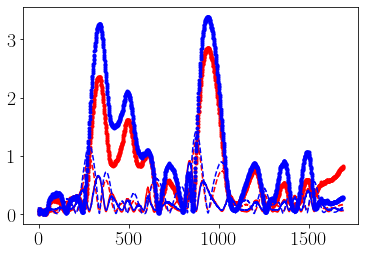

In [61]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
import CRPS.CRPS as pscore

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt


def simulate(tr, sample_idx, print_values=False, mean=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    
    pair_id = Config.car_interactive_pair_list[3]
    if mean:
        driver_para = tr.posterior.mu_d[:,:,3,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu_d[:,sample_idx,3,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp

        a_follower_temp = IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    
print_values = False

sample_num = 1000


_, a_follower, _, v_follower, _, s_follower, T = simulate(tr_GP, 0, print_values, mean=True)


cache = "../Simulator/cache/Hierarchical-sim-one-car-" + str(sample_num) + ".pkl"
print(cache)

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)

T_size = a_follower.shape[0]

a_follower_sim_GP = np.zeros((sample_num, T_size))
v_follower_sim_GP = np.zeros((sample_num, T_size))
s_follower_sim_GP = np.zeros((sample_num, T_size))
a_follower_sim_B = np.zeros((sample_num, T_size))
v_follower_sim_B = np.zeros((sample_num, T_size))
s_follower_sim_B = np.zeros((sample_num, T_size))


for counter in range(sample_num): #range(sample_num):#
    a_follower_sim_GP[counter,:] = tracks[counter]['a_follower_sim_GP']
    v_follower_sim_GP[counter,:] = tracks[counter]['v_follower_sim_GP']
    s_follower_sim_GP[counter,:] = tracks[counter]['s_follower_sim_GP']
    a_follower_sim_B[counter,:] = tracks[counter]['a_follower_sim_B']
    v_follower_sim_B[counter,:] = tracks[counter]['v_follower_sim_B']
    s_follower_sim_B[counter,:] = tracks[counter]['s_follower_sim_B']
    
crps_a_GP = np.zeros(T_size)
crps_v_GP = np.zeros(T_size)
crps_s_GP = np.zeros(T_size)
crps_a_B = np.zeros(T_size)
crps_v_B = np.zeros(T_size)
crps_s_B = np.zeros(T_size)

for t in range(T_size):
    crps_a_GP[t],_,_ = pscore(a_follower_sim_GP[:,t], a_follower[t]).compute()
    crps_v_GP[t],_,_ = pscore(v_follower_sim_GP[:,t], v_follower[t]).compute()
    crps_s_GP[t],_,_ = pscore(s_follower_sim_GP[:,t], s_follower[t]).compute()
    crps_a_B[t],_,_ = pscore(a_follower_sim_B[:,t], a_follower[t]).compute()
    crps_v_B[t],_,_ = pscore(v_follower_sim_B[:,t], v_follower[t]).compute()
    crps_s_B[t],_,_ = pscore(s_follower_sim_B[:,t], s_follower[t]).compute()
    counter += 1

plt.plot(crps_a_GP,'r-')
plt.plot(crps_v_GP,'r--')
plt.plot(crps_s_GP,'r.')
plt.plot(crps_a_B,'b-')
plt.plot(crps_v_B,'b--')
plt.plot(crps_s_B,'b.')

print("crps_a_GP:", crps_a_GP.mean())
print("crps_v_GP:", crps_v_GP.mean())
print("crps_s_GP:", crps_s_GP.mean())
print("crps_a_B:", crps_a_B.mean())
print("crps_v_B:", crps_v_B.mean())
print("crps_s_B:", crps_s_B.mean())

print("crps_a_GP at 37s:", crps_a_GP[int(37/0.04-1)])
print("crps_v_GP at 37s:", crps_v_GP[int(37/0.04-1)])
print("crps_s_GP at 37s:", crps_s_GP[int(37/0.04-1)])
print("crps_a_B at 37s:", crps_a_B[int(37/0.04-1)])
print("crps_v_B at 37s:", crps_v_B[int(37/0.04-1)])
print("crps_s_B at 37s:", crps_s_B[int(37/0.04-1)])

Load trace ../PGM/cache/GP_IDM_hierarchical-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl : done!
../Simulator/cache/Hierarchical-sim-one-truck-1000.pkl
Load tracks ../Simulator/cache/Hierarchical-sim-one-truck-1000.pkl : done!
crps_a_GP: 0.10806626726238378
crps_v_GP: 0.24573677746859587
crps_s_GP: 1.3082847319492814
crps_a_B: 0.1220384571049986
crps_v_B: 0.37079532478428234
crps_s_B: 2.6382364723426353
crps_a_GP at 45s: 0.055811660232273214
crps_v_GP at 45s: 0.1717418664170583
crps_s_GP at 45s: 3.9140472103786044
crps_a_B at 45s: 0.07331544728869105
crps_v_B at 45s: 0.2153352745253333
crps_s_B at 45s: 7.714899638092986
crps_a_GP at 42s: 0.18335370410769236
crps_v_GP at 42s: 0.19622685156238484
crps_s_GP at 42s: 4.480104652372624
crps_a_B at 42s: 0.15166548183862685
crps_v_B at 42s: 0.46471690754341155
crps_s_B at 42s: 7.075284963585447


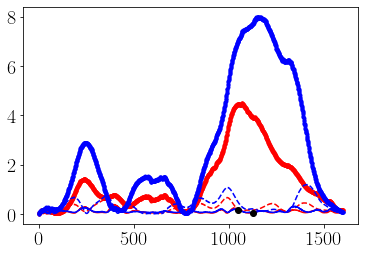

In [128]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
import CRPS.CRPS as pscore

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt


def simulate(tr, sample_idx, print_values=False, mean=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    
    pair_id = Config.truck_interactive_pair_list[0]
    if mean:
        driver_para = tr.posterior.mu_d[:,:,8,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu_d[:,sample_idx,8,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp

        a_follower_temp = IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_hierarchical-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    
print_values = False

sample_num = 1000


_, a_follower, _, v_follower, _, s_follower, T = simulate(tr_GP, 0, print_values, mean=True)


cache = "../Simulator/cache/Hierarchical-sim-one-truck-" + str(sample_num) + ".pkl"
print(cache)

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)

T_size = a_follower.shape[0]

a_follower_sim_GP = np.zeros((sample_num, T_size))
v_follower_sim_GP = np.zeros((sample_num, T_size))
s_follower_sim_GP = np.zeros((sample_num, T_size))
a_follower_sim_B = np.zeros((sample_num, T_size))
v_follower_sim_B = np.zeros((sample_num, T_size))
s_follower_sim_B = np.zeros((sample_num, T_size))


for counter in range(sample_num): #range(sample_num):#
    a_follower_sim_GP[counter,:] = tracks[counter]['a_follower_sim_GP']
    v_follower_sim_GP[counter,:] = tracks[counter]['v_follower_sim_GP']
    s_follower_sim_GP[counter,:] = tracks[counter]['s_follower_sim_GP']
    a_follower_sim_B[counter,:] = tracks[counter]['a_follower_sim_B']
    v_follower_sim_B[counter,:] = tracks[counter]['v_follower_sim_B']
    s_follower_sim_B[counter,:] = tracks[counter]['s_follower_sim_B']
    
crps_a_GP = np.zeros(T_size)
crps_v_GP = np.zeros(T_size)
crps_s_GP = np.zeros(T_size)
crps_a_B = np.zeros(T_size)
crps_v_B = np.zeros(T_size)
crps_s_B = np.zeros(T_size)

for t in range(T_size):
    crps_a_GP[t],_,_ = pscore(a_follower_sim_GP[:,t], a_follower[t]).compute()
    crps_v_GP[t],_,_ = pscore(v_follower_sim_GP[:,t], v_follower[t]).compute()
    crps_s_GP[t],_,_ = pscore(s_follower_sim_GP[:,t], s_follower[t]).compute()
    crps_a_B[t],_,_ = pscore(a_follower_sim_B[:,t], a_follower[t]).compute()
    crps_v_B[t],_,_ = pscore(v_follower_sim_B[:,t], v_follower[t]).compute()
    crps_s_B[t],_,_ = pscore(s_follower_sim_B[:,t], s_follower[t]).compute()
    counter += 1

plt.plot(crps_a_GP,'r-')
plt.plot(crps_v_GP,'r--')
plt.plot(crps_s_GP,'r.')
plt.plot(crps_a_B,'b-')
plt.plot(crps_v_B,'b--')
plt.plot(crps_s_B,'b.')
plt.plot(int(45/0.04-1), crps_a_GP[int(45/0.04-1)],'ko')
plt.plot(int(42/0.04-1), crps_a_GP[int(42/0.04-1)],'ko')

print("crps_a_GP:", crps_a_GP.mean())
print("crps_v_GP:", crps_v_GP.mean())
print("crps_s_GP:", crps_s_GP.mean())
print("crps_a_B:", crps_a_B.mean())
print("crps_v_B:", crps_v_B.mean())
print("crps_s_B:", crps_s_B.mean())

print("crps_a_GP at 45s:", crps_a_GP[int(45/0.04-1)])
print("crps_v_GP at 45s:", crps_v_GP[int(45/0.04-1)])
print("crps_s_GP at 45s:", crps_s_GP[int(45/0.04-1)])
print("crps_a_B at 45s:", crps_a_B[int(45/0.04-1)])
print("crps_v_B at 45s:", crps_v_B[int(45/0.04-1)])
print("crps_s_B at 45s:", crps_s_B[int(45/0.04-1)])

print("crps_a_GP at 42s:", crps_a_GP[int(42/0.04-1)])
print("crps_v_GP at 42s:", crps_v_GP[int(42/0.04-1)])
print("crps_s_GP at 42s:", crps_s_GP[int(42/0.04-1)])
print("crps_a_B at 42s:", crps_a_B[int(42/0.04-1)])
print("crps_v_B at 42s:", crps_v_B[int(42/0.04-1)])
print("crps_s_B at 42s:", crps_s_B[int(42/0.04-1)])

Load trace ../PGM/cache/GP_IDM_pooled_car-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_pool_car-exp.pkl : done!
../Simulator/cache/Pooled-sim-one-car-1000.pkl
Load tracks ../Simulator/cache/Pooled-sim-one-car-1000.pkl : done!
crps_a_GP: 0.24846750913490973
crps_v_GP: 0.5953305121257412
crps_s_GP: 2.587299473307985
crps_a_B: 0.22537045819217558
crps_v_B: 0.5864925248603767
crps_s_B: 2.214074088657092
crps_a_GP at 37s: 0.5461802295410076
crps_v_GP at 37s: 0.8884719989267832
crps_s_GP at 37s: 5.8497850797813316
crps_a_B at 37s: 0.5403258193928763
crps_v_B at 37s: 0.5761417715087929
crps_s_B at 37s: 4.739321644053522


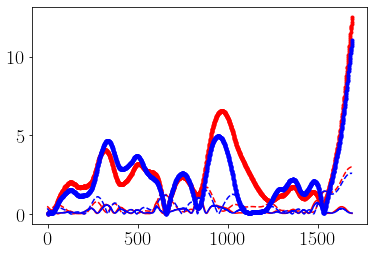

In [59]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
import CRPS.CRPS as pscore

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt


def simulate(tr, sample_idx, print_values=False, mean=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    
    pair_id = Config.car_interactive_pair_list[3]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp

        a_follower_temp = IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_pooled_car-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_pool_car-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    
print_values = False

sample_num = 1000


_, a_follower, _, v_follower, _, s_follower, T = simulate(tr_GP, 0, print_values, mean=True)


cache = "../Simulator/cache/Pooled-sim-one-car-" + str(sample_num) + ".pkl"
print(cache)

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)

T_size = a_follower.shape[0]

a_follower_sim_GP = np.zeros((sample_num, T_size))
v_follower_sim_GP = np.zeros((sample_num, T_size))
s_follower_sim_GP = np.zeros((sample_num, T_size))
a_follower_sim_B = np.zeros((sample_num, T_size))
v_follower_sim_B = np.zeros((sample_num, T_size))
s_follower_sim_B = np.zeros((sample_num, T_size))


for counter in range(sample_num): #range(sample_num):#
    a_follower_sim_GP[counter,:] = tracks[counter]['a_follower_sim_GP']
    v_follower_sim_GP[counter,:] = tracks[counter]['v_follower_sim_GP']
    s_follower_sim_GP[counter,:] = tracks[counter]['s_follower_sim_GP']
    a_follower_sim_B[counter,:] = tracks[counter]['a_follower_sim_B']
    v_follower_sim_B[counter,:] = tracks[counter]['v_follower_sim_B']
    s_follower_sim_B[counter,:] = tracks[counter]['s_follower_sim_B']
    
crps_a_GP = np.zeros(T_size)
crps_v_GP = np.zeros(T_size)
crps_s_GP = np.zeros(T_size)
crps_a_B = np.zeros(T_size)
crps_v_B = np.zeros(T_size)
crps_s_B = np.zeros(T_size)

for t in range(T_size):
    crps_a_GP[t],_,_ = pscore(a_follower_sim_GP[:,t], a_follower[t]).compute()
    crps_v_GP[t],_,_ = pscore(v_follower_sim_GP[:,t], v_follower[t]).compute()
    crps_s_GP[t],_,_ = pscore(s_follower_sim_GP[:,t], s_follower[t]).compute()
    crps_a_B[t],_,_ = pscore(a_follower_sim_B[:,t], a_follower[t]).compute()
    crps_v_B[t],_,_ = pscore(v_follower_sim_B[:,t], v_follower[t]).compute()
    crps_s_B[t],_,_ = pscore(s_follower_sim_B[:,t], s_follower[t]).compute()
    counter += 1

plt.plot(crps_a_GP,'r-')
plt.plot(crps_v_GP,'r--')
plt.plot(crps_s_GP,'r.')
plt.plot(crps_a_B,'b-')
plt.plot(crps_v_B,'b--')
plt.plot(crps_s_B,'b.')

print("crps_a_GP:", crps_a_GP.mean())
print("crps_v_GP:", crps_v_GP.mean())
print("crps_s_GP:", crps_s_GP.mean())
print("crps_a_B:", crps_a_B.mean())
print("crps_v_B:", crps_v_B.mean())
print("crps_s_B:", crps_s_B.mean())

print("crps_a_GP at 37s:", crps_a_GP[int(37/0.04-1)])
print("crps_v_GP at 37s:", crps_v_GP[int(37/0.04-1)])
print("crps_s_GP at 37s:", crps_s_GP[int(37/0.04-1)])
print("crps_a_B at 37s:", crps_a_B[int(37/0.04-1)])
print("crps_v_B at 37s:", crps_v_B[int(37/0.04-1)])
print("crps_s_B at 37s:", crps_s_B[int(37/0.04-1)])

Load trace ../PGM/cache/GP_IDM_pooled_truck-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_pool_truck-exp.pkl : done!
../Simulator/cache/Pooled-sim-one-truck-1000.pkl
Load tracks ../Simulator/cache/Pooled-sim-one-truck-1000.pkl : done!
crps_a_GP: 0.13060538150915757
crps_v_GP: 0.5555921829015174
crps_s_GP: 3.637277235784533
crps_a_B: 0.1507297453159143
crps_v_B: 0.7528293641651947
crps_s_B: 4.52617810901664
crps_a_GP at 45s: 0.059517788473265956
crps_v_GP at 45s: 0.9220950690738158
crps_s_GP at 45s: 1.2924297012974457
crps_a_B at 45s: 0.07073233902872811
crps_v_B at 45s: 1.467028678391667
crps_s_B at 45s: 2.557775111917018


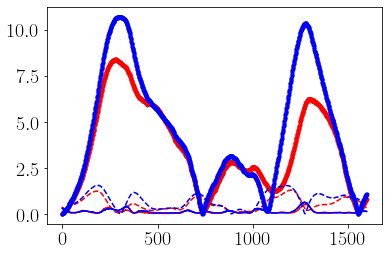

In [57]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
import CRPS.CRPS as pscore

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt


def simulate(tr, sample_idx, print_values=False, mean=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    
    pair_id = Config.truck_interactive_pair_list[0]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp

        a_follower_temp = IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_pooled_truck-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_pool_truck-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    
print_values = False

sample_num = 1000


_, a_follower, _, v_follower, _, s_follower, T = simulate(tr_GP, 0, print_values, mean=True)


cache = "../Simulator/cache/Pooled-sim-one-truck-" + str(sample_num) + ".pkl"
print(cache)

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)

T_size = a_follower.shape[0]

a_follower_sim_GP = np.zeros((sample_num, T_size))
v_follower_sim_GP = np.zeros((sample_num, T_size))
s_follower_sim_GP = np.zeros((sample_num, T_size))
a_follower_sim_B = np.zeros((sample_num, T_size))
v_follower_sim_B = np.zeros((sample_num, T_size))
s_follower_sim_B = np.zeros((sample_num, T_size))


for counter in range(sample_num): #range(sample_num):#
    a_follower_sim_GP[counter,:] = tracks[counter]['a_follower_sim_GP']
    v_follower_sim_GP[counter,:] = tracks[counter]['v_follower_sim_GP']
    s_follower_sim_GP[counter,:] = tracks[counter]['s_follower_sim_GP']
    a_follower_sim_B[counter,:] = tracks[counter]['a_follower_sim_B']
    v_follower_sim_B[counter,:] = tracks[counter]['v_follower_sim_B']
    s_follower_sim_B[counter,:] = tracks[counter]['s_follower_sim_B']
    
crps_a_GP = np.zeros(T_size)
crps_v_GP = np.zeros(T_size)
crps_s_GP = np.zeros(T_size)
crps_a_B = np.zeros(T_size)
crps_v_B = np.zeros(T_size)
crps_s_B = np.zeros(T_size)

for t in range(T_size):
    crps_a_GP[t],_,_ = pscore(a_follower_sim_GP[:,t], a_follower[t]).compute()
    crps_v_GP[t],_,_ = pscore(v_follower_sim_GP[:,t], v_follower[t]).compute()
    crps_s_GP[t],_,_ = pscore(s_follower_sim_GP[:,t], s_follower[t]).compute()
    crps_a_B[t],_,_ = pscore(a_follower_sim_B[:,t], a_follower[t]).compute()
    crps_v_B[t],_,_ = pscore(v_follower_sim_B[:,t], v_follower[t]).compute()
    crps_s_B[t],_,_ = pscore(s_follower_sim_B[:,t], s_follower[t]).compute()
    counter += 1

plt.plot(crps_a_GP,'r-')
plt.plot(crps_v_GP,'r--')
plt.plot(crps_s_GP,'r.')
plt.plot(crps_a_B,'b-')
plt.plot(crps_v_B,'b--')
plt.plot(crps_s_B,'b.')

print("crps_a_GP:", crps_a_GP.mean())
print("crps_v_GP:", crps_v_GP.mean())
print("crps_s_GP:", crps_s_GP.mean())
print("crps_a_B:", crps_a_B.mean())
print("crps_v_B:", crps_v_B.mean())
print("crps_s_B:", crps_s_B.mean())

print("crps_a_GP at 45s:", crps_a_GP[int(45/0.04-1)])
print("crps_v_GP at 45s:", crps_v_GP[int(45/0.04-1)])
print("crps_s_GP at 45s:", crps_s_GP[int(45/0.04-1)])
print("crps_a_B at 45s:", crps_a_B[int(45/0.04-1)])
print("crps_v_B at 45s:", crps_v_B[int(45/0.04-1)])
print("crps_s_B at 45s:", crps_s_B[int(45/0.04-1)])

Load trace ../PGM/cache/GP_IDM_unpooled_car-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_unpool_car-exp.pkl : done!
../Simulator/cache/Unpooled-sim-one-car-1000.pkl
Load tracks ../Simulator/cache/Unpooled-sim-one-car-1000.pkl : done!
crps_a_GP: 0.194643449000819
crps_v_GP: 0.2704390466488156
crps_s_GP: 0.7578668340574451
crps_a_B: 0.18877766721069736
crps_v_B: 0.32670498650459096
crps_s_B: 0.9014167415710103
crps_a_GP at 37s: 0.5073188865066938
crps_v_GP at 37s: 0.2564432898439454
crps_s_GP at 37s: 2.7287758207714865
crps_a_B at 37s: 0.5108086374190756
crps_v_B at 37s: 0.3228375249476986
crps_s_B at 37s: 3.1809187225680806


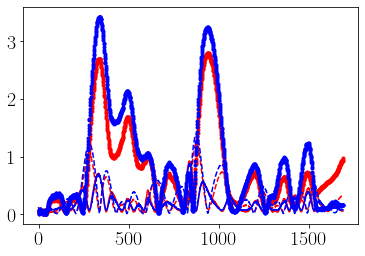

In [60]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
import CRPS.CRPS as pscore

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt


def simulate(tr, sample_idx, print_values=False, mean=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    
    pair_id = Config.car_interactive_pair_list[3]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp

        a_follower_temp = IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_unpooled_car-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_unpool_car-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    
print_values = False

sample_num = 1000


_, a_follower, _, v_follower, _, s_follower, T = simulate(tr_GP, 0, print_values, mean=True)


cache = "../Simulator/cache/Unpooled-sim-one-car-" + str(sample_num) + ".pkl"
print(cache)

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)

T_size = a_follower.shape[0]

a_follower_sim_GP = np.zeros((sample_num, T_size))
v_follower_sim_GP = np.zeros((sample_num, T_size))
s_follower_sim_GP = np.zeros((sample_num, T_size))
a_follower_sim_B = np.zeros((sample_num, T_size))
v_follower_sim_B = np.zeros((sample_num, T_size))
s_follower_sim_B = np.zeros((sample_num, T_size))


for counter in range(sample_num): #range(sample_num):#
    a_follower_sim_GP[counter,:] = tracks[counter]['a_follower_sim_GP']
    v_follower_sim_GP[counter,:] = tracks[counter]['v_follower_sim_GP']
    s_follower_sim_GP[counter,:] = tracks[counter]['s_follower_sim_GP']
    a_follower_sim_B[counter,:] = tracks[counter]['a_follower_sim_B']
    v_follower_sim_B[counter,:] = tracks[counter]['v_follower_sim_B']
    s_follower_sim_B[counter,:] = tracks[counter]['s_follower_sim_B']
    
crps_a_GP = np.zeros(T_size)
crps_v_GP = np.zeros(T_size)
crps_s_GP = np.zeros(T_size)
crps_a_B = np.zeros(T_size)
crps_v_B = np.zeros(T_size)
crps_s_B = np.zeros(T_size)

for t in range(T_size):
    crps_a_GP[t],_,_ = pscore(a_follower_sim_GP[:,t], a_follower[t]).compute()
    crps_v_GP[t],_,_ = pscore(v_follower_sim_GP[:,t], v_follower[t]).compute()
    crps_s_GP[t],_,_ = pscore(s_follower_sim_GP[:,t], s_follower[t]).compute()
    crps_a_B[t],_,_ = pscore(a_follower_sim_B[:,t], a_follower[t]).compute()
    crps_v_B[t],_,_ = pscore(v_follower_sim_B[:,t], v_follower[t]).compute()
    crps_s_B[t],_,_ = pscore(s_follower_sim_B[:,t], s_follower[t]).compute()
    counter += 1

plt.plot(crps_a_GP,'r-')
plt.plot(crps_v_GP,'r--')
plt.plot(crps_s_GP,'r.')
plt.plot(crps_a_B,'b-')
plt.plot(crps_v_B,'b--')
plt.plot(crps_s_B,'b.')

print("crps_a_GP:", crps_a_GP.mean())
print("crps_v_GP:", crps_v_GP.mean())
print("crps_s_GP:", crps_s_GP.mean())
print("crps_a_B:", crps_a_B.mean())
print("crps_v_B:", crps_v_B.mean())
print("crps_s_B:", crps_s_B.mean())

print("crps_a_GP at 37s:", crps_a_GP[int(37/0.04-1)])
print("crps_v_GP at 37s:", crps_v_GP[int(37/0.04-1)])
print("crps_s_GP at 37s:", crps_s_GP[int(37/0.04-1)])
print("crps_a_B at 37s:", crps_a_B[int(37/0.04-1)])
print("crps_v_B at 37s:", crps_v_B[int(37/0.04-1)])
print("crps_s_B at 37s:", crps_s_B[int(37/0.04-1)])

Load trace ../PGM/cache/GP_IDM_unpooled_truck-exp.pkl : done!
Load trace ../PGM/cache/Bayesian_IDM_unpool_truck-exp.pkl : done!
../Simulator/cache/Unpooled-sim-one-truck-1000.pkl
Load tracks ../Simulator/cache/Unpooled-sim-one-truck-1000.pkl : done!
crps_a_GP: 0.1098702239715839
crps_v_GP: 0.23932041981310923
crps_s_GP: 1.136070767056683
crps_a_B: 0.11936870372787886
crps_v_B: 0.33244756879734727
crps_s_B: 1.8338290405826154
crps_a_GP at 45s: 0.05190230750797488
crps_v_GP at 45s: 0.17030500769685764
crps_s_GP at 45s: 3.4103056884631506
crps_a_B at 45s: 0.074308366257924
crps_v_B at 45s: 0.08018981898416155
crps_s_B at 45s: 6.074236557058478


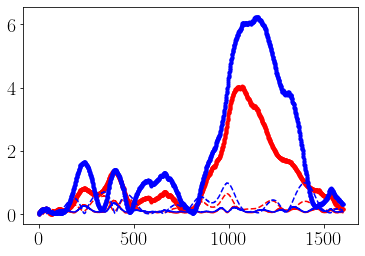

In [58]:
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
import CRPS.CRPS as pscore

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'Times New Roman'

def IDM_a(VMAX, DSAFE, TSAFE, AMAX, AMIN, DELTA, s, vt, dv):
    sn = DSAFE + vt * TSAFE + vt * dv / (2 * np.sqrt(AMAX * AMIN))
    a = AMAX * (1 - (vt / VMAX) ** DELTA - (sn / s) ** 2)
    return a

def IDM_v(IDM_a, vt):
    return vt + IDM_a * Config.dt

def IDM_x(IDM_v, xt, vt):
    return xt + 0.5 * (IDM_v + vt) * Config.dt


def simulate(tr, sample_idx, print_values=False, mean=False):
    tracks = read_training_data(base_path=base_path, min_traj_lenth=50/Config.dt)
    
    pair_id = Config.truck_interactive_pair_list[0]
    if mean:
        driver_para = tr.posterior.mu[:,:,:].mean(axis=0).mean(axis=0).to_numpy()
    else:
        driver_para = tr.posterior.mu[:,sample_idx,:].mean(axis=0).to_numpy()

    DELTA = 4 
    
    if print_values:
        print("Loading parameters for driver", str(pair_id))
        print(driver_para)

    x_leader, v_leader = tracks[pair_id]['xLeaderReal'], tracks[pair_id]['vLeaderReal']

    x_follower, v_follower, a_follower, vehicle_length = tracks[pair_id]['xFollReal'], \
                tracks[pair_id]['vFollReal'], tracks[pair_id]['aFollReal'], tracks[pair_id]['vehicle_length']

    s_real = tracks[pair_id]['sReal']

    N = x_leader.shape[0]

    T = np.array(range(0, N))*Config.dt

    x_follower_temp = x_follower[0]
    v_follower_temp = v_follower[0]

    x_follower_sim = np.zeros(N)
    s_follower_sim = np.zeros(N)
    v_follower_sim = np.zeros(N)
    a_follower_sim = np.zeros(N)

    v_follower_sim[0] = v_follower_temp
    s_follower_sim[0] = s_real[0]

    for t in range(1, N):
        x_leader_temp = x_leader[t-1]
        v_leader_temp = v_leader[t-1]

        s = x_leader_temp - x_follower_temp - vehicle_length[t-1]
        vt = v_follower_temp
        dv = v_follower_temp - v_leader_temp

        a_follower_temp = IDM_a(driver_para[0], driver_para[1], driver_para[2], driver_para[3], driver_para[4], DELTA, s, vt, dv)
        v_follower_temp = IDM_v(a_follower_temp, vt)
        x_follower_temp  = IDM_x(v_follower_temp, x_follower_temp, vt)

        x_follower_sim[t] = x_follower_temp
        s_follower_sim[t] = s
        v_follower_sim[t] = v_follower_temp
        a_follower_sim[t-1] = a_follower_temp

    a_follower_sim[-1] = a_follower_sim[-2]

    return a_follower_sim, a_follower, v_follower_sim, v_follower, s_follower_sim, s_real, T

base_path = '../data/highD/'

cache = "../PGM/cache/GP_IDM_unpooled_truck-exp.pkl"
fp = open(cache, 'rb')
tr_GP = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")

cache = "../PGM/cache/Bayesian_IDM_unpool_truck-exp.pkl"
fp = open(cache, 'rb')
tr_B = pickle.load(fp)
fp.close()
print("Load trace", cache, ": done!")
    
print_values = False

sample_num = 1000


_, a_follower, _, v_follower, _, s_follower, T = simulate(tr_GP, 0, print_values, mean=True)


cache = "../Simulator/cache/Unpooled-sim-one-truck-" + str(sample_num) + ".pkl"
print(cache)

if path.exists(cache):
    try:
        fp = open(cache, 'rb')
        tracks = pickle.load(fp)
        fp.close()
        print("Load tracks", cache, ": done!")
    except UnpicklingError:
        os.remove(cache)
        print('Removed broken cache:', cache)

T_size = a_follower.shape[0]

a_follower_sim_GP = np.zeros((sample_num, T_size))
v_follower_sim_GP = np.zeros((sample_num, T_size))
s_follower_sim_GP = np.zeros((sample_num, T_size))
a_follower_sim_B = np.zeros((sample_num, T_size))
v_follower_sim_B = np.zeros((sample_num, T_size))
s_follower_sim_B = np.zeros((sample_num, T_size))


for counter in range(sample_num): #range(sample_num):#
    a_follower_sim_GP[counter,:] = tracks[counter]['a_follower_sim_GP']
    v_follower_sim_GP[counter,:] = tracks[counter]['v_follower_sim_GP']
    s_follower_sim_GP[counter,:] = tracks[counter]['s_follower_sim_GP']
    a_follower_sim_B[counter,:] = tracks[counter]['a_follower_sim_B']
    v_follower_sim_B[counter,:] = tracks[counter]['v_follower_sim_B']
    s_follower_sim_B[counter,:] = tracks[counter]['s_follower_sim_B']
    
crps_a_GP = np.zeros(T_size)
crps_v_GP = np.zeros(T_size)
crps_s_GP = np.zeros(T_size)
crps_a_B = np.zeros(T_size)
crps_v_B = np.zeros(T_size)
crps_s_B = np.zeros(T_size)

for t in range(T_size):
    crps_a_GP[t],_,_ = pscore(a_follower_sim_GP[:,t], a_follower[t]).compute()
    crps_v_GP[t],_,_ = pscore(v_follower_sim_GP[:,t], v_follower[t]).compute()
    crps_s_GP[t],_,_ = pscore(s_follower_sim_GP[:,t], s_follower[t]).compute()
    crps_a_B[t],_,_ = pscore(a_follower_sim_B[:,t], a_follower[t]).compute()
    crps_v_B[t],_,_ = pscore(v_follower_sim_B[:,t], v_follower[t]).compute()
    crps_s_B[t],_,_ = pscore(s_follower_sim_B[:,t], s_follower[t]).compute()
    counter += 1

plt.plot(crps_a_GP,'r-')
plt.plot(crps_v_GP,'r--')
plt.plot(crps_s_GP,'r.')
plt.plot(crps_a_B,'b-')
plt.plot(crps_v_B,'b--')
plt.plot(crps_s_B,'b.')

print("crps_a_GP:", crps_a_GP.mean())
print("crps_v_GP:", crps_v_GP.mean())
print("crps_s_GP:", crps_s_GP.mean())
print("crps_a_B:", crps_a_B.mean())
print("crps_v_B:", crps_v_B.mean())
print("crps_s_B:", crps_s_B.mean())

print("crps_a_GP at 45s:", crps_a_GP[int(45/0.04-1)])
print("crps_v_GP at 45s:", crps_v_GP[int(45/0.04-1)])
print("crps_s_GP at 45s:", crps_s_GP[int(45/0.04-1)])
print("crps_a_B at 45s:", crps_a_B[int(45/0.04-1)])
print("crps_v_B at 45s:", crps_v_B[int(45/0.04-1)])
print("crps_s_B at 45s:", crps_s_B[int(45/0.04-1)])